# **PREDICTION OF BLUEBERRY YIELD** 🍇
*WOW project - kaggle playground series*

# **Business Problem**

My teammate, Zhangbo and I, both love blueberries. We have it in our pastries, our milkshakes and in our jams. This is why we were wondering what it takes to actually grow blueberries and what factors assess its yield. This also led to suggesting actionable decision variables for prospective blueberry farmers that would be able to decide where to set up their farms to get the best bang for their buck. Afterall, there can never be too many blueberries in this world.

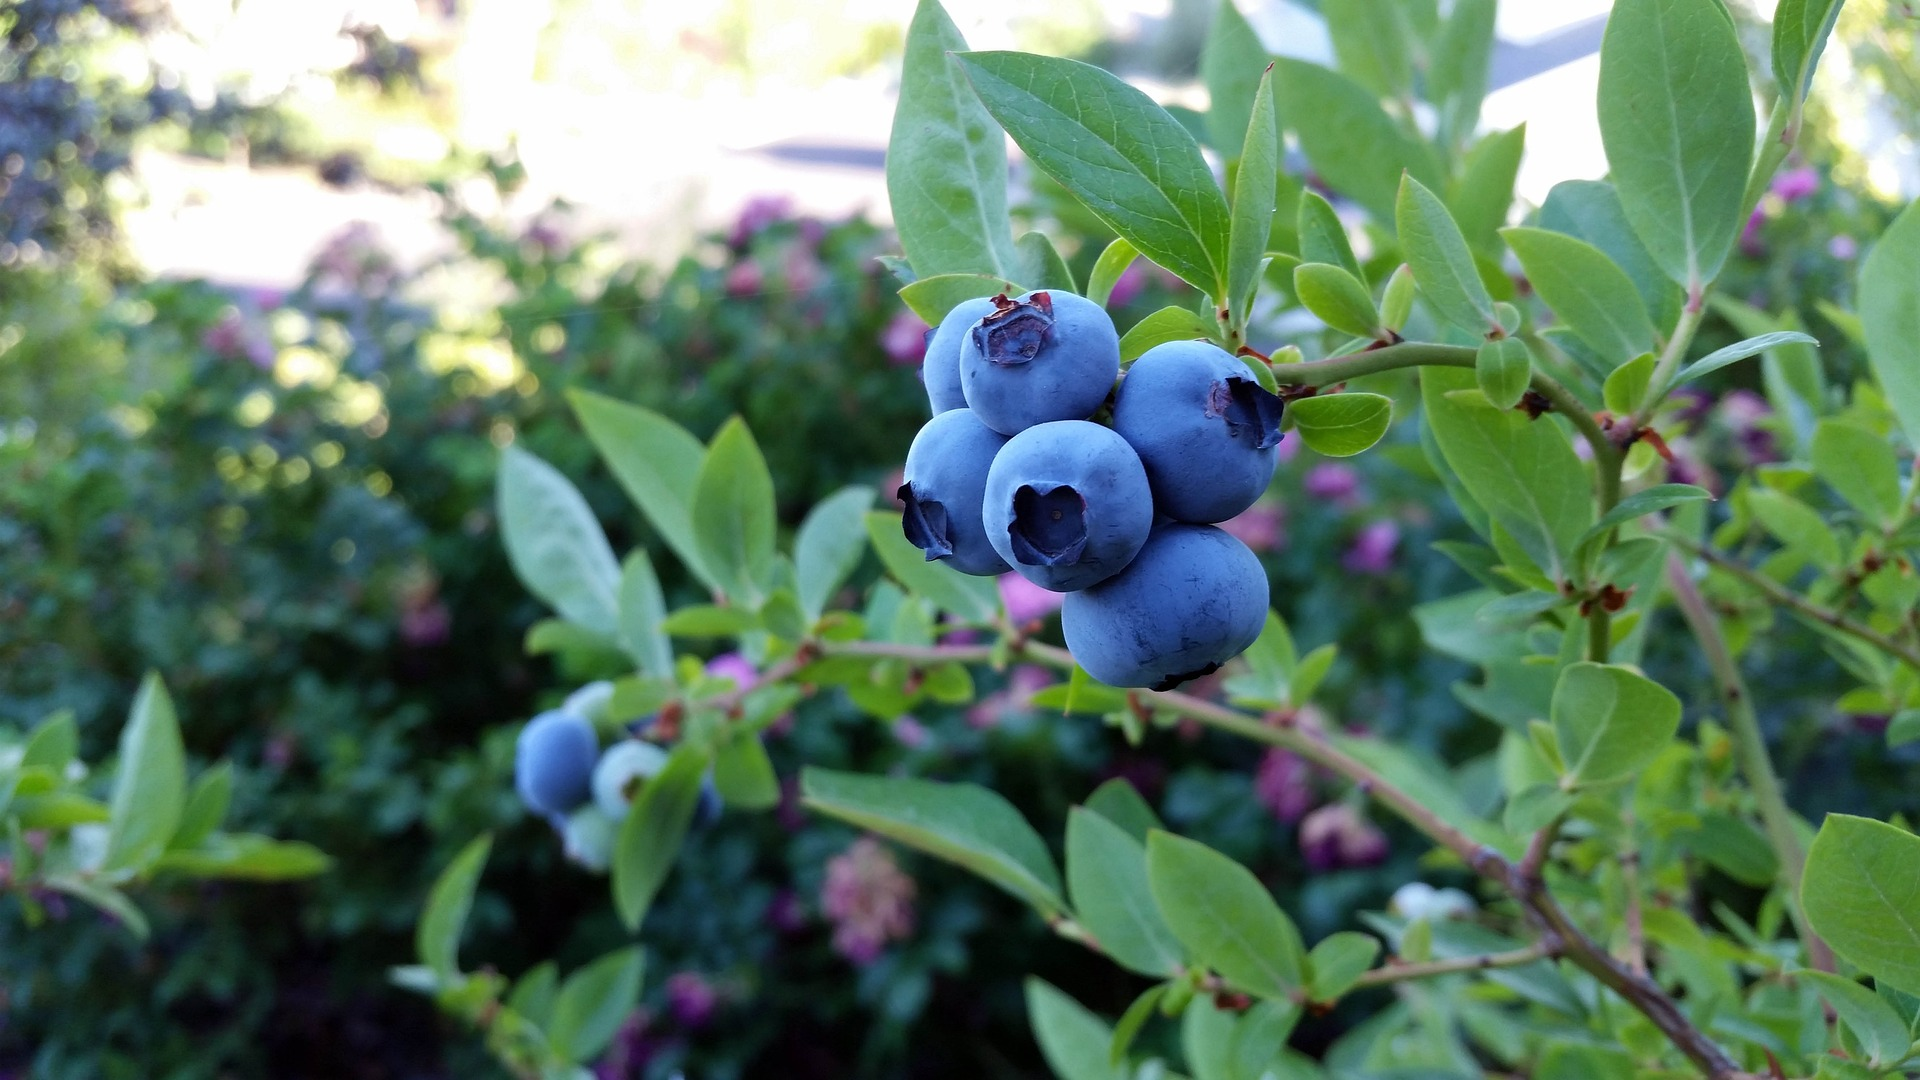

# **BLUF**

We propose to use an XGBoost regressor trained on 3 features: 'fruitset', 'seeds', and 'fruitmass' to predict yield with 82% accuracy and with acceptable MSE. This decision was reached after considering a number of factors and methodologies:

**Feature Importance Analysis**: Our team conducted an exhaustive feature importance analysis, including an ElasticNet method, which effectively reduces the weight of unimportant features to zero. This process led us to identify three key features for our model.

**Data Integrity**: Our dataset was free of missing values and duplicates, ensuring the integrity of our analysis and eliminating potential bias caused by synthetic minority oversampling or undersampling techniques. A single skewed feature was identified and rectified, although this feature was ultimately determined to be of minimal importance to our analysis.

**Multicollinearity**: We observed multicollinearity in temperature features. We hypothesize that this could be due to the artificial nature of our Kaggle-generated dataset.

**Model Selection**: We conducted a series of "horse races" among base regressors and stacked ensembles, using Mean Squared Error (MSE) and R-squared (R^2) as our primary evaluation metrics. Our selection criteria required an R^2 score greater than 0.8 and minimized MSE. Both XGBoost and stacked ensembles emerged as top performers.

**Comparison with AutoAI Solutions**: We tested our model against pycaret and Aquarium H20 AutoAI solutions. Our model, being less complicated and computationally efficient, outperformed these automated solutions. We consider this a significant achievement.

**Hyperparameter Tuning and Validation**: We performed hyperparameter tuning on our XGBoost model using a grid search approach. We validated our results with K-fold cross-validation to ensure robustness and reliability.

**Explainability**: We successfully generated a surrogate Decision Tree model that showed a 95.9% correlation with our predictions, thereby facilitating model interpretation. We further enhanced our understanding of the model using eXplainable AI (XAI) tools such as LIME, Partial Dependence Plots (PDPs), and Shapley values.

We are confident in our approach and the results we've achieved, and we believe that this process has provided us with a robust, efficient, and interpretable model.

# **Data dictionary**
➔ **id**: A unique identifier for each observation in the dataset.

➔ **clonesize**: The size of the blueberry plant clones, measured in square meters.

➔ **honeybee**: The number of honeybees observed in the area.

➔ **bumbles**: The number of bumblebees observed in the area.

➔ **andrena**: The number of Andrena bees observed in the area.

➔ **osmia**: The number of Osmia bees observed in the area.

➔ **MaxOfUpperTRange**: The maximum temperature range observed during the day,measured in degrees Celsius, for the upper range of the plant.

➔ **MinOfUpperTRange**: The minimum temperature range observed during the day,measured in degrees Celsius, for the upper range of the plant.

➔ **AverageOfUpperTRange**: The average temperature range observed during the day,measured in degrees Celsius, for the upper range of the plant.

➔ **MaxOfLowerTRange**: The maximum temperature range observed during the day,measured in degrees Celsius, for the lower range of the plant.

➔ **MinOfLowerTRange**: The minimum temperature range observed during the day,measured in degrees Celsius, for the lower range of the plant.

➔ **AverageOfLowerTRange**: The average temperature range observed during the day,measured in degrees Celsius, for the lower range of the plant.

➔ **RainingDays**: The number of days with rain observed in the area during the growing season.

➔ **AverageRainingDays**: The average number of days with rain observed in the area during the growing season.

➔ **fruitset**: The percentage of flowers that develop into fruits.

➔ **Fruitmass**: The total mass of fruits produced by the plant, measured in grams.

➔ **seeds**: The total number of seeds produced by the plant.

➔ **yield**: The total yield of blueberries produced by the plant, measured in grams.

# ***Libraries***
and loading our data

In [ ]:
# !pip install matplotlib
#!pip install matplotlib

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error



In [2]:
#skewness correction
import scipy.stats as ss

In [3]:
#winsorizing
from scipy.stats.mstats import winsorize

In [4]:
#data visualization
import matplotlib.pyplot as plt

In [5]:
!pip install psynlig 
from sklearn.decomposition import PCA
from psynlig import pca_explained_variance_bar


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.4/147.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.7/572.7 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 570.0/570.0 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.2 MB/s eta 0:00:00
  Attempting uninstall: docutils
    Found existing installation: docutils 0.16
    Uninstalling doc

In [6]:
#XGB featu|re importance
import xgboost as xgb

In [7]:
from sklearn.inspection import partial_dependence

In [8]:
#Elastic net feature importance
from sklearn.linear_model import ElasticNet

In [9]:
#PCA
from sklearn.decomposition import PCA

In [10]:
#metrics
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [11]:
# learing curve and regressor building kit
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
# Keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.model_selection import ShuffleSplit
from xgboost import XGBRegressor
#!pip install lightgbm
from lightgbm import LGBMRegressor
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline

from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning


In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [13]:
from sklearn.model_selection import GridSearchCV, learning_curve, cross_validate

In [14]:
!pip install shap==0.40.0
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 371.7/371.7 kB 6.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shap: filename=shap-0.40.0-cp310-cp310-linux_x86_64.whl size=552498 sha256=2bc8c830db9c1d9dd031a10a9f1ff4cc081dbf42d49f64b620e496105002b9a4
  Stored in directory: /root/.cache/pip/wheels/33/28/e3/62a9dc612c58c1b8d1c16fa51e64941bbb38ac8a6decbad39c
Successfully built shap


In [15]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.5/483.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.3 MB/s eta 0:00:00


In [16]:
#pycaret
from pycaret.regression import *
import warnings
warnings.filterwarnings("ignore")

In [17]:
from sklearn.pipeline import Pipeline

In [18]:
#loading the datasets

uploaded = files.upload()


Saving train.csv to train.csv


In [21]:
uploaded2 = files.upload()


Saving test.csv to test.csv


In [22]:
df_train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df_test =pd.read_csv(io.BytesIO(uploaded2['test.csv']))

# ***EDA & Pre-processing***

**Summary:**
1.   No missing values
2.   No duplicates
3.   All features are numeric (int/float) so no label encoding/ one-hot encoding needed. We might decide to do binning to turn numeric data to categorical for feature engineering purposes, but for now everything looks good
4.   'HoneyBee' was heavily skewed, but was fixed
5.    Outliers were detected and fixed using Tukey's rule
6.   Used Standard Scaler to standadize the split datasets. See "Checkpoint' for final dataframe names.
7. Fruitset, fruitmass and seeds are highly correlated while features like RainingDays, AverageRainingDays, Clone size, and honeybee show weaker correlation
8. From feature importance: we can conclude that fruitset, seeds and fruitmass are the most important features.
9. For PCA: we see the learning curves merge to an MSE of about 0.20



In [23]:
#Both on training and test data
# Check the shape of the dataframe
print(f"The shape of the train dataframe is: {df_train.shape}")
print(f"The shape of the test dataframe is: {df_test.shape}")


The shape of the train dataframe is: (15289, 18)
The shape of the test dataframe is: (10194, 17)


In [24]:
#checking datatypes:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [25]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10194 non-null  int64  
 1   clonesize             10194 non-null  float64
 2   honeybee              10194 non-null  float64
 3   bumbles               10194 non-null  float64
 4   andrena               10194 non-null  float64
 5   osmia                 10194 non-null  float64
 6   MaxOfUpperTRange      10194 non-null  float64
 7   MinOfUpperTRange      10194 non-null  float64
 8   AverageOfUpperTRange  10194 non-null  float64
 9   MaxOfLowerTRange      10194 non-null  float64
 10  MinOfLowerTRange      10194 non-null  float64
 11  AverageOfLowerTRange  10194 non-null  float64
 12  RainingDays           10194 non-null  float64
 13  AverageRainingDays    10194 non-null  float64
 14  fruitset              10194 non-null  float64
 15  fruitmass          

In [26]:
#checking descriptive statistics
print(df_train.describe())

                 id     clonesize      honeybee       bumbles       andrena  \
count  15289.000000  15289.000000  15289.000000  15289.000000  15289.000000   
mean    7644.000000     19.704690      0.389314      0.286768      0.492675   
std     4413.698468      6.595211      0.361643      0.059917      0.148115   
min        0.000000     10.000000      0.000000      0.000000      0.000000   
25%     3822.000000     12.500000      0.250000      0.250000      0.380000   
50%     7644.000000     25.000000      0.500000      0.250000      0.500000   
75%    11466.000000     25.000000      0.500000      0.380000      0.630000   
max    15288.000000     40.000000     18.430000      0.585000      0.750000   

              osmia  MaxOfUpperTRange  MinOfUpperTRange  AverageOfUpperTRange  \
count  15289.000000      15289.000000      15289.000000          15289.000000   
mean       0.592355         82.169887         49.673281             68.656256   
std        0.139489          9.146703        

In [27]:
print(df_test.describe())

                 id     clonesize      honeybee       bumbles       andrena  \
count  10194.000000  10194.000000  10194.000000  10194.000000  10194.000000   
mean   20385.500000     19.795958      0.391606      0.286307      0.491328   
std     2942.898656      6.591864      0.390022      0.059867      0.148166   
min    15289.000000     10.000000      0.000000      0.000000      0.000000   
25%    17837.250000     12.500000      0.250000      0.250000      0.380000   
50%    20385.500000     25.000000      0.500000      0.250000      0.500000   
75%    22933.750000     25.000000      0.500000      0.380000      0.630000   
max    25482.000000     37.500000     18.430000      0.585000      0.750000   

              osmia  MaxOfUpperTRange  MinOfUpperTRange  AverageOfUpperTRange  \
count  10194.000000      10194.000000      10194.000000          10194.000000   
mean       0.593222         82.207014         49.697204             68.687816   
std        0.139897          9.153442        

In [28]:
#we can see that there are no missing values from the above describe. but just to confirm:
print(f"Missing values: {df_train.isnull().sum()}")

Missing values: id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64


In [29]:
print(f"Missing values: {df_test.isnull().sum()}")

Missing values: id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
dtype: int64


In [30]:
#checking for duplicates
print(f"Duplicates in train: {df_train.duplicated().sum()}")
print(f"Duplicates in test: {df_test.duplicated().sum()}")

Duplicates in train: 0
Duplicates in test: 0


In [31]:
#Dropping if columns in both datasets
df_train = df_train.drop(columns=['id'])
df_test = df_test.drop(columns=['id'])


In [32]:
# Separate Target and Predictor Variables
X_Train=df_train.drop(['yield'],axis=1)
y_Train=df_train['yield']
X_Test =df_test

In [33]:
# Check for skewness ## honeybee is the only variable and it is heavily skewed
print(f"Skewness: {X_Train.skew()}")

Skewness: clonesize                0.049861
honeybee                41.613244
bumbles                  0.815571
andrena                  0.162047
osmia                   -0.845196
MaxOfUpperTRange         0.007359
MinOfUpperTRange         0.002006
AverageOfUpperTRange    -0.004707
MaxOfLowerTRange         0.002450
MinOfLowerTRange         0.004846
AverageOfLowerTRange     0.005105
RainingDays             -0.261968
AverageRainingDays       0.081863
fruitset                -0.426606
fruitmass               -0.055531
seeds                    0.015387
dtype: float64


In [34]:
# Code for skewness correction (see source below)
# Depending upon the characteritics of a feature (column), a log, Box-Cox or power transform is applied to normalize the distribution 

# -*- coding: utf-8 -*-
"""
Created on Sat Feb 23 14:42:46 2019
@author: DATAmadness
"""

##################################################
# A function that will accept a pandas dataframe
# and auto-transforms columns that exceeds threshold value
#  -  Offers choice between boxcox or log / exponential transformation
#  -  Automatically handles negative values
#  -  Auto recognizes positive /negative skewness

# Further documentation available here:
# https://datamadness.github.io/Skewness_Auto_Transform

def skew_autotransform(DF, include = None, exclude = None, plot = False, threshold = 1, exp = False):
    
    #Get list of column names that should be processed based on input parameters
    if include is None and exclude is None:
        colnames = DF.columns.values
    elif include is not None:
        colnames = include
    elif exclude is not None:
        colnames = [item for item in list(DF.columns.values) if item not in exclude]
    else:
        print('No columns to process!')
    
    #Helper function that checks if all values are positive
    def make_positive(series):
        minimum = np.amin(series)
        #If minimum is negative, offset all values by a constant to move all values to positive teritory
        if minimum <= 0:
            series = series + abs(minimum) + 0.01
        return series
    
    
    #Go through desired columns in DataFrame
    for col in colnames:
        #Get column skewness
        skew = DF[col].skew()
        transformed = True
        
        if plot:
            #Prep the plot of original data
            sns.set_style("darkgrid")
            sns.set_palette("Blues_r")
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            #ax1 = sns.distplot(DF[col], ax=axes[0])
            ax1 = sns.histplot(DF[col], ax=axes[0], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
            ax1.set(xlabel='Original ' + str(col))
        
        #If skewness is larger than threshold and positively skewed; If yes, apply appropriate transformation
        if abs(skew) > threshold and skew > 0:
            skewType = 'positive'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply log transformation 
               DF[col] = DF[col].apply(math.log)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
         
        elif abs(skew) > threshold and skew < 0:
            skewType = 'negative'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply exp transformation 
               DF[col] = DF[col].pow(10)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
        
        else:
            #Flag if no transformation was performed
            transformed = False
            skew_new = skew
        
        #Compare before and after if plot is True
        if plot:
            print('\n ------------------------------------------------------')     
            if transformed:
                print('\n %r had %r skewness of %2.2f' %(col, skewType, skew))
                print('\n Transformation yielded skewness of %2.2f' %(skew_new))
                sns.set_palette("Paired")
                #ax2 = sns.distplot(DF[col], ax=axes[1], color = 'r')
                ax2 = sns.histplot(DF[col], ax=axes[1], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)
                ax2.set(xlabel='Transformed ' + str(col))
                plt.show()
            else:
                print('\n NO TRANSFORMATION APPLIED FOR %r . Skewness = %2.2f' %(col, skew))
                #ax2 = sns.distplot(DF[col], ax=axes[1])
                ax2 = sns.histplot(DF[col], ax=axes[1], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
                ax2.set(xlabel='NO TRANSFORM ' + str(col))
                plt.show()
    return DF

In [35]:
# We concatenate X_train and X_test and then run skewness correction on the quant columns
# The reason for concatening is to get equal treatment on the features of X_train and X_test 
len_train = len(X_Train)
len_test = len(X_Test)
df = pd.concat([X_Train,X_Test],axis=0)
print('Lengths of Train and Test sets are',len_train,len_test)
print('Shape of df, X_Train and X_Test',df.shape, X_Train.shape,X_Test.shape)


Lengths of Train and Test sets are 15289 10194
Shape of df, X_Train and X_Test (25483, 16) (15289, 16) (10194, 16)



 ------------------------------------------------------

 'honeybee' had 'positive' skewness of 40.79

 Transformation yielded skewness of 0.09


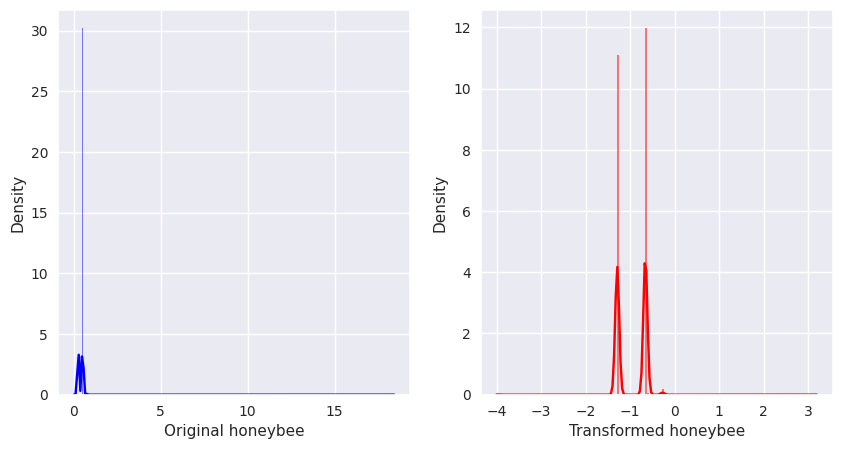

In [36]:
# Use code above (adapted from https://github.com/datamadness/Automatic-skewness-transformation-for-Pandas-DataFrame) to correct skewness
df = skew_autotransform(df.copy(deep=True), include=['honeybee'],plot = True, exp = False, threshold = 1)

In [37]:
# Recover X_train and X_test
X_train=df[:len_train]
X_test=df[len_train:]
print('Shape of X_Train and X_Test', X_Train.shape,X_Test.shape)

Shape of X_Train and X_Test (15289, 16) (10194, 16)


## Splitting Training Dataset into train and test 

In [38]:
# Create holdout sample from TRain data
# Note: split before doing any trasformations on the data!!!
from sklearn.model_selection import train_test_split
X_Train_train, X_Train_test, y_Train_train, y_Train_test =\
    train_test_split(X_Train, y_Train, 
                     test_size=0.2,    # 80-20 training vs test set split
                     random_state=0)
print('Shape of X and y',X_Train.shape, y_Train.shape, '\nShape of training set X and y',X_Train_train.shape, y_Train_train.shape, '\nShape of test set X and y',X_Train_test.shape, y_Train_test.shape) 

Shape of X and y (15289, 16) (15289,) 
Shape of training set X and y (12231, 16) (12231,) 
Shape of test set X and y (3058, 16) (3058,)


## Outlier Detection and Tukeys rule

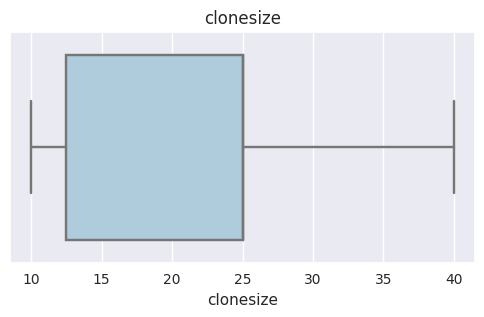

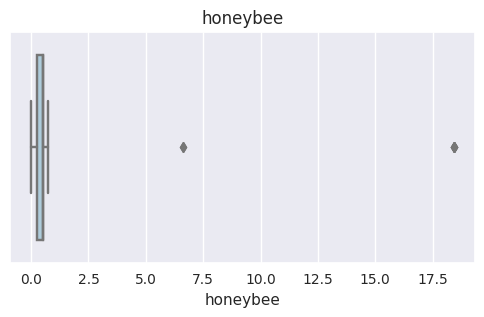

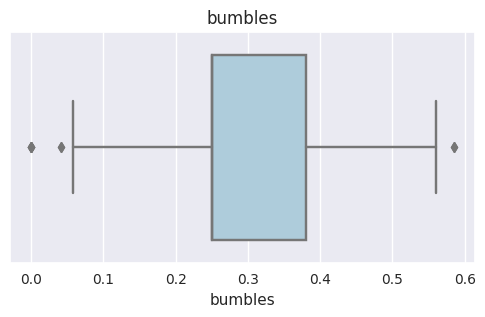

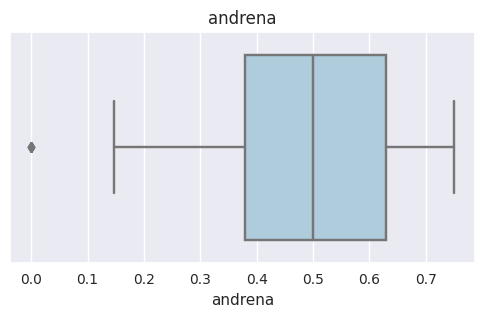

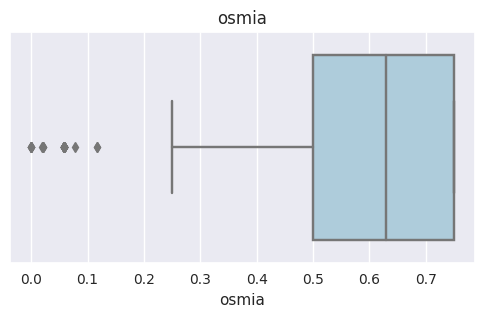

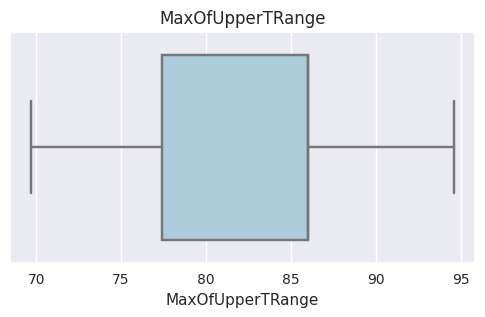

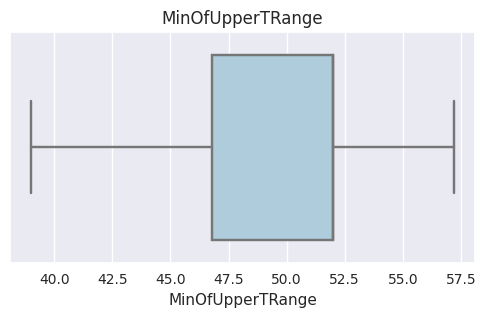

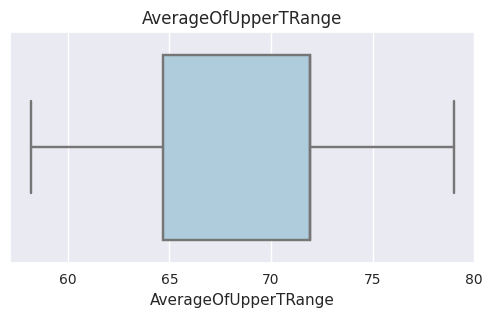

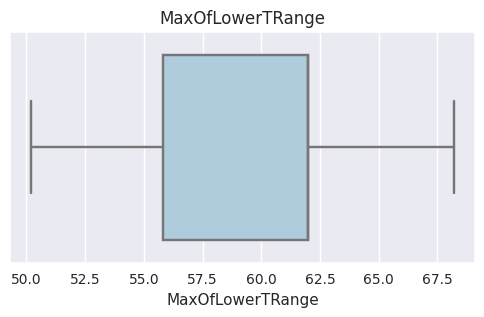

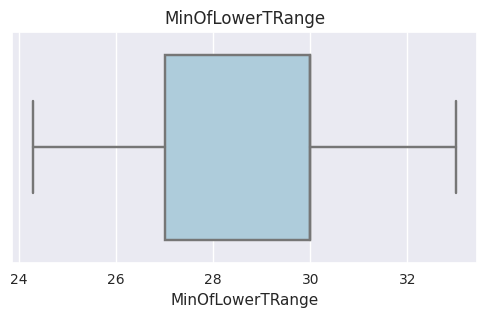

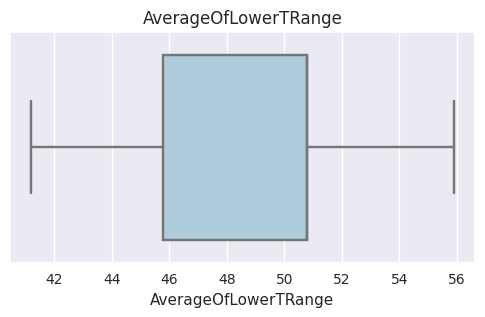

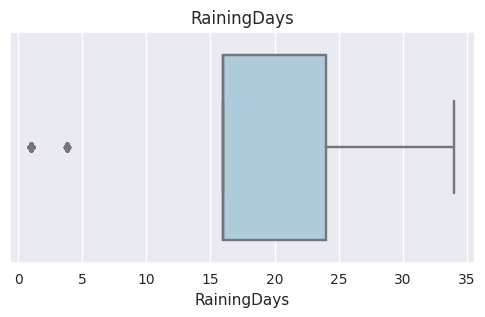

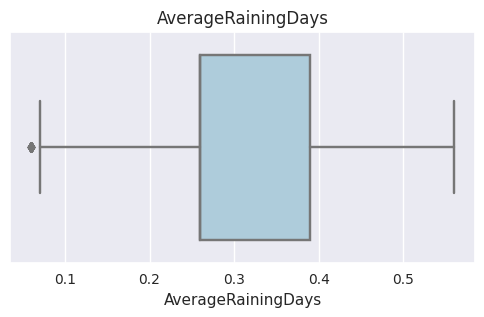

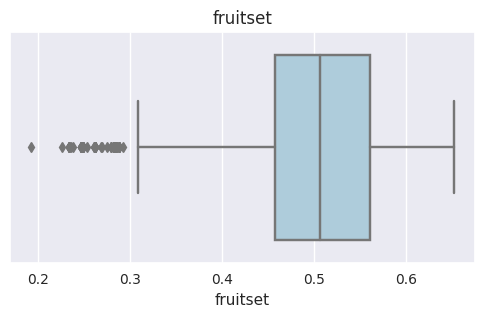

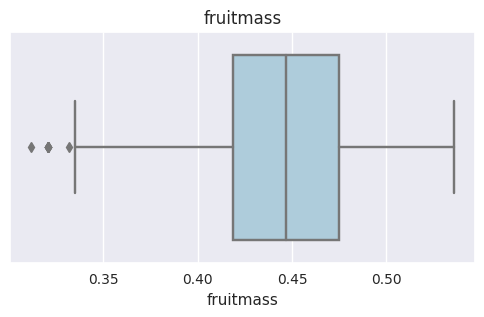

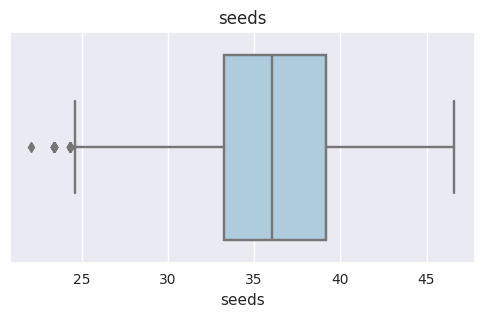

In [39]:
# Check for outliers using boxplots
for column in df.columns:
  plt.figure(figsize=(6,3))
  sns.boxplot(x=X_Train_train[column])
  plt.title(column)
  plt.show()

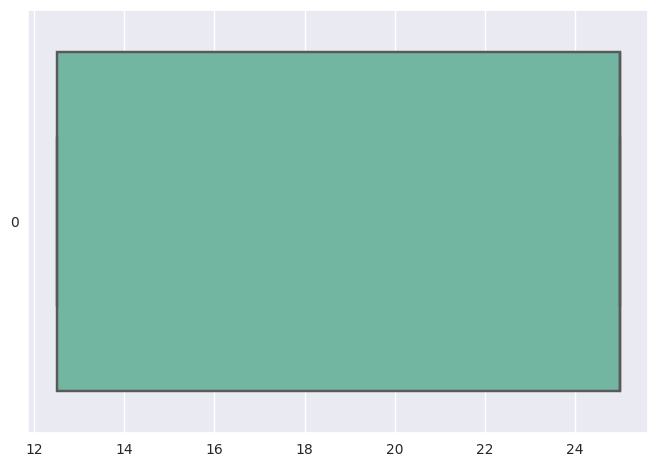

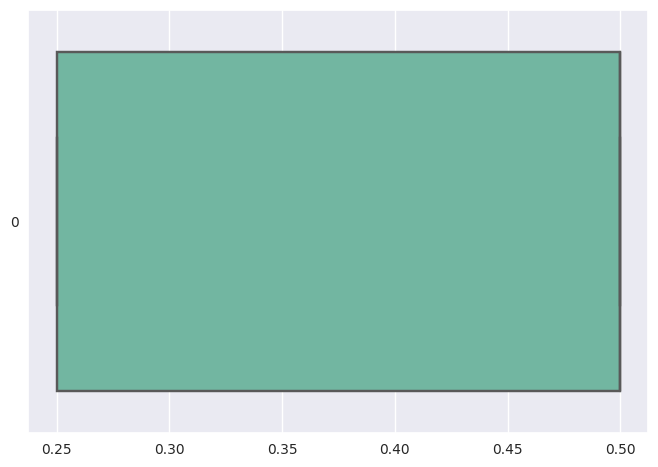

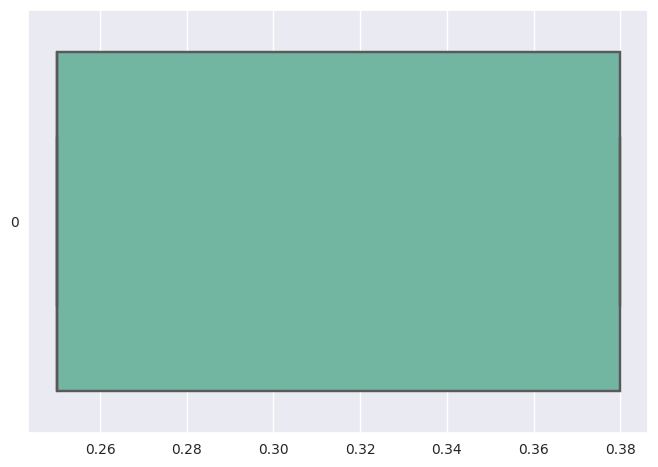

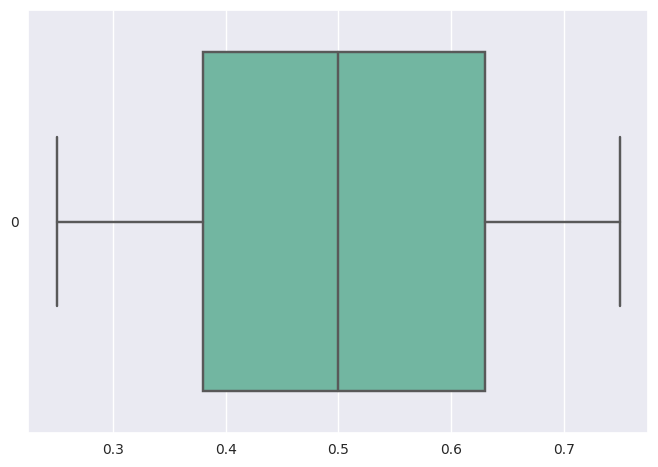

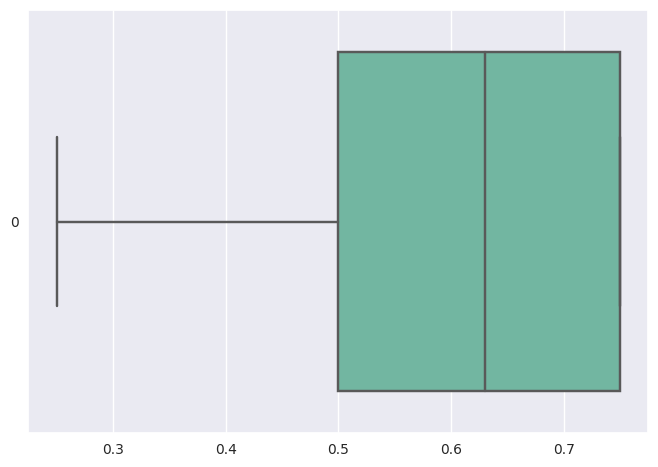

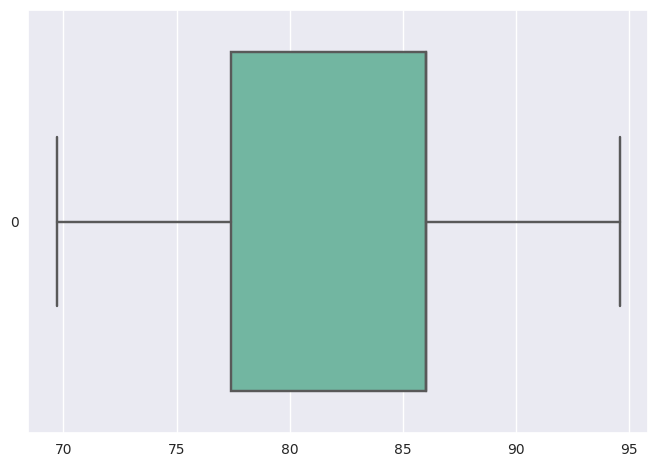

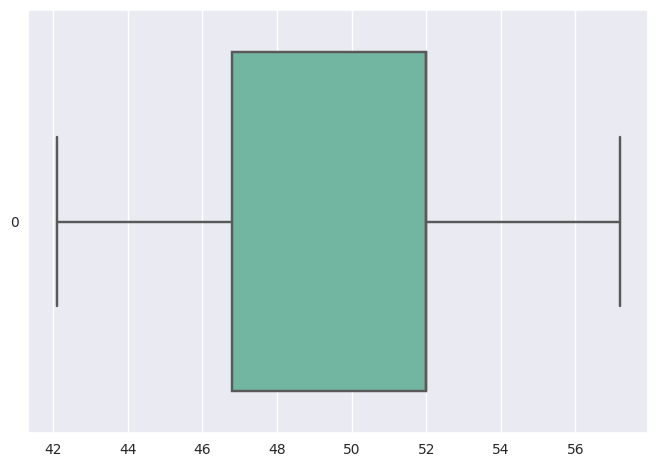

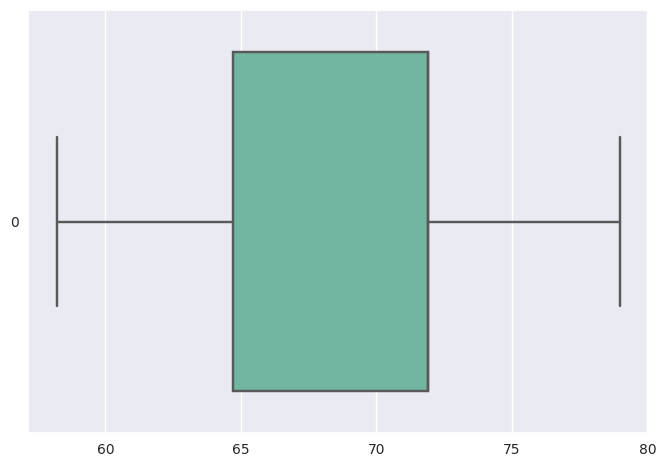

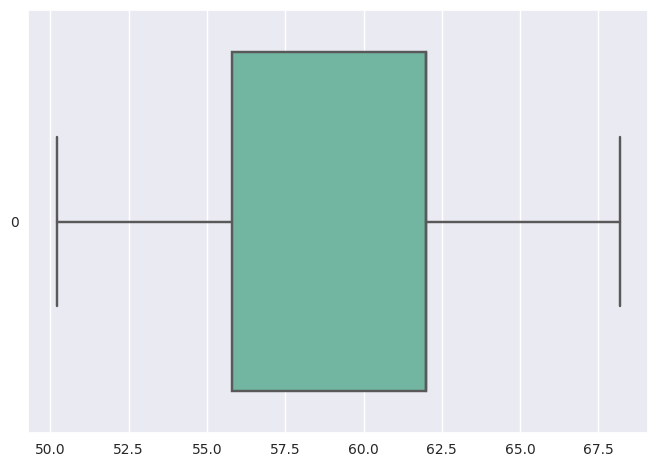

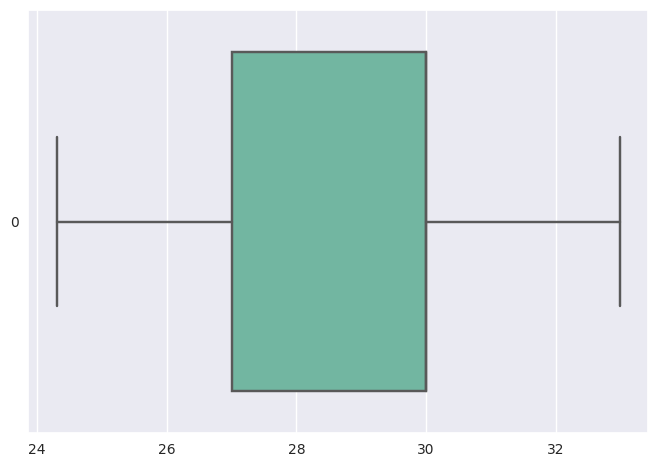

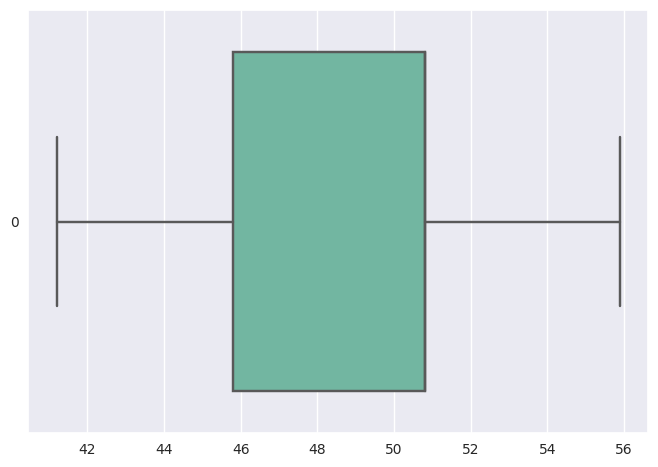

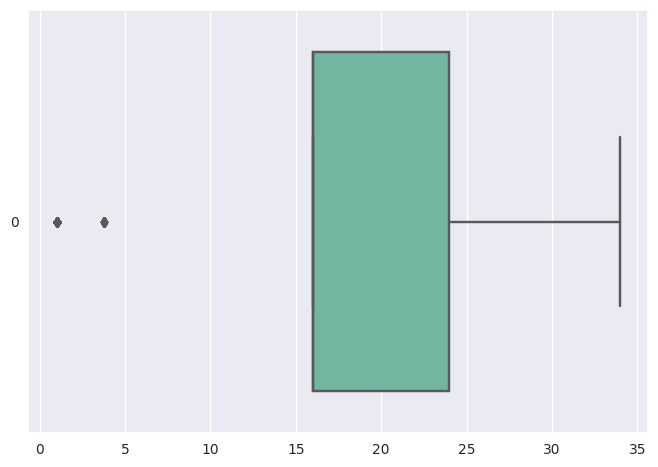

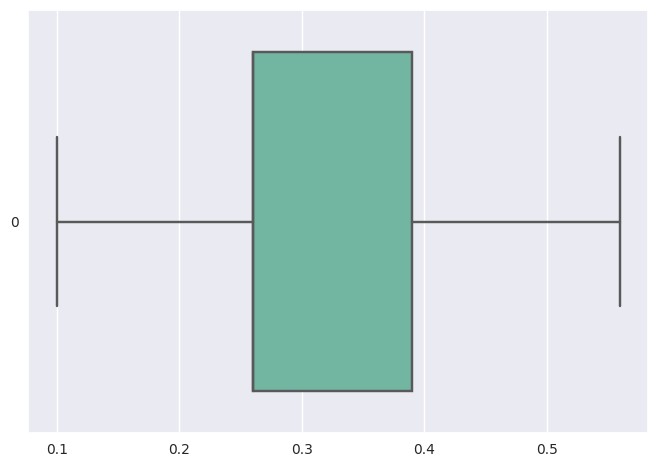

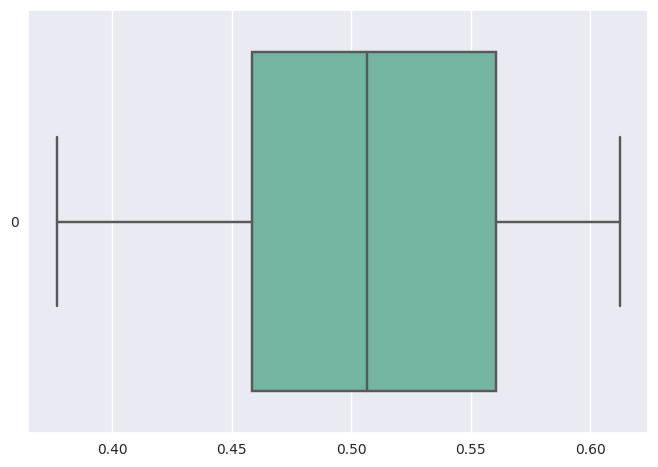

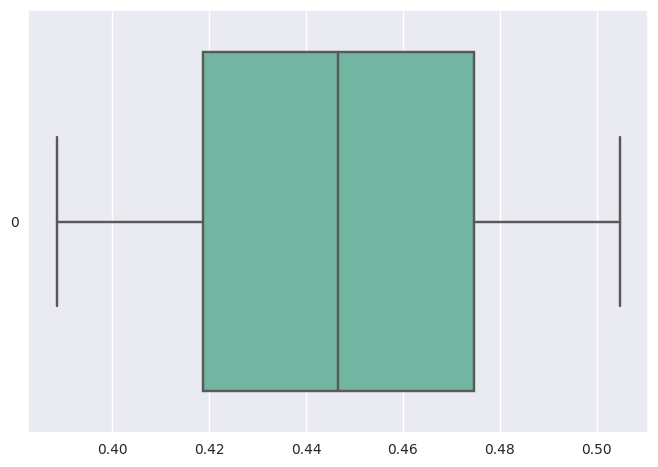

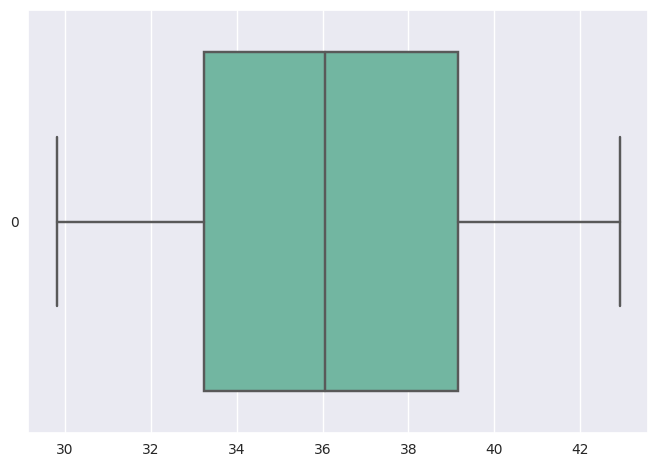

In [40]:
# Tukey Rule outliers

cols = X_Train_train.columns

#Tukey's method
def tukey_rule(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_lim = data[col].quantile(0.5) + 2 * IQR
    lower_lim = data[col].quantile(0.5) - 2 * IQR
    outliers = []
    for index, x in enumerate(data[col]):
        if x < lower_lim or x >= upper_lim:
            outliers.append(index)
    return outliers

# Identify outliers
for i in cols:
  outliers_Tukey = tukey_rule(X_Train_train,i)
  
# Winsorize X and check the results
X_Train_train_winsorized = X_Train_train.copy(deep=True)
for i in cols:
  X_Train_train_winsorized[i] = winsorize(X_Train_train[i], limits=(0.05, 0.05))
  ax = sns.boxplot(data=X_Train_train_winsorized[i], orient="h", palette="Set2")
  plt.show()

## Scaling

In [41]:
# Standardize
stdsc1 = StandardScaler()  
X_Train_train_std = stdsc1.fit_transform(X_Train_train_winsorized)
X_Train_test_std = stdsc1.transform(X_Train_test)
X_Test_std = stdsc1.transform(X_Test)

y_Train_train=pd.DataFrame(y_Train_train)
y_Train_test=pd.DataFrame(y_Train_test)


stdsc2 = StandardScaler()  
y_Train_train_std = stdsc2.fit_transform(y_Train_train)
y_Train_test_std = stdsc2.transform(y_Train_test)

In [42]:
# Convert standardized arrays back to pandas dataframes
y_Train_train_std = pd.DataFrame(y_Train_train_std, columns=y_Train_train.columns)
y_Train_test_std = pd.DataFrame(y_Train_test_std, columns=y_Train_test.columns)
X_Train_train_std = pd.DataFrame(X_Train_train_std, columns=X_Train_train_winsorized.columns)
X_Train_test_std = pd.DataFrame(X_Train_test_std, columns=X_Train_test.columns)
X_Test_std = pd.DataFrame(X_Test_std, columns=X_Test.columns)

##CHECKPOINT:

Dataframe and their mappings:

##*Training*
X_Train_train_std = Outlier corrected and standardized/ scaled training dataframe derived from the X_train dataframe
Y_Train_train_std = Output for the above training set

testing from the training set:
X_Train_test_std, y_Train_test_std: observations from the X_train dataframe to test accuracy and build learning curves from this model


##*Testing*
X_test_std = competition testing data from test.csv with preprocessing done

## Feature importance and PCA

In [43]:
plt.figure(figsize=(15, 20))

<Figure size 1500x2000 with 0 Axes>

<Figure size 1500x2000 with 0 Axes>

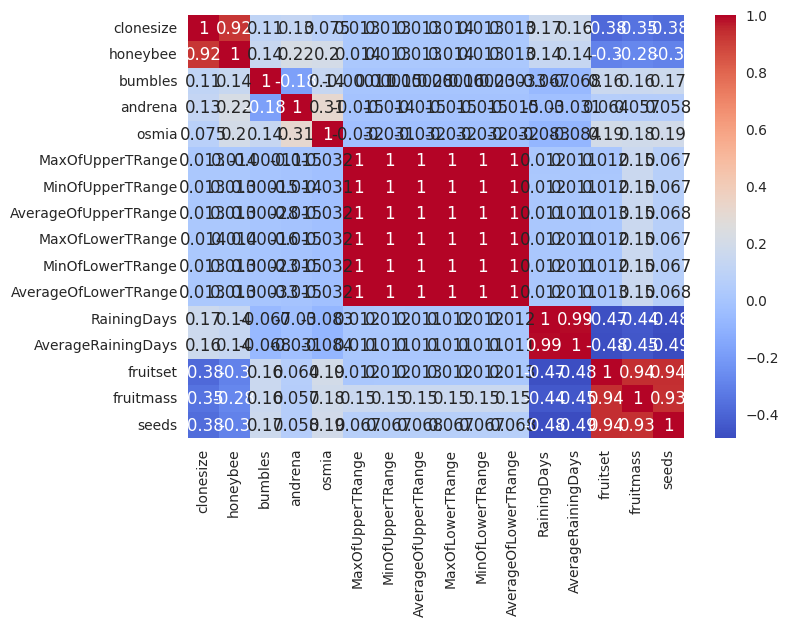

<Figure size 1500x2000 with 0 Axes>

In [44]:
#heatmap
corr_matrix = X_Train_train_std.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.figure(figsize=(15,20))
plt.show()

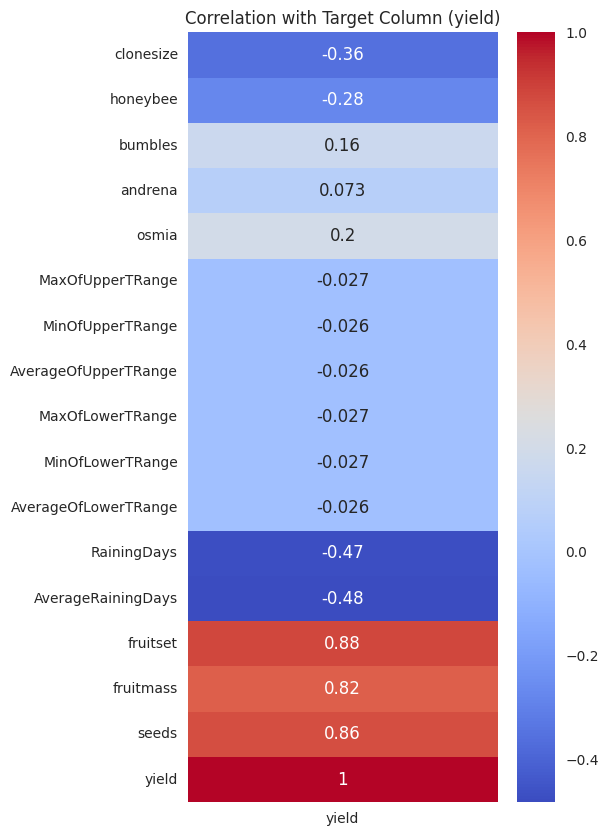

In [45]:

# Since the above heatmap is a little cluttered; focusing only on corelations with Target column 'yield'
data = pd.concat([X_Train_train_std, y_Train_train_std], axis=1)

# Calculate correlation matrix
corr_matrix = data.corr()

# Filter correlation matrix for target column only
target_corr = corr_matrix['yield']

# Plot heatmap of correlations with the target column
plt.figure(figsize=(5, 10))
sns.heatmap(target_corr.to_frame(), annot=True, cmap='coolwarm')
plt.title('Correlation with Target Column (yield)')
plt.show()


### Feature importance : Random Forest Regressor

In [46]:
X_cols =X_Train_train_std.columns
Y_cols = y_Train_train_std.columns

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_Train_train_std, y_Train_train_std)

importances = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_cols, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance_df)

y_pred = model.predict(X_Train_test_std)
mse = mean_squared_error(y_Train_test_std, y_pred)
print("Mean Squared Error:", mse)


Feature Importance:
                  Feature  Importance
13              fruitset    0.745514
15                 seeds    0.142837
14             fruitmass    0.040982
3                andrena    0.013113
4                  osmia    0.012235
11           RainingDays    0.008291
12    AverageRainingDays    0.007615
2                bumbles    0.004771
0              clonesize    0.003993
10  AverageOfLowerTRange    0.003264
1               honeybee    0.003020
6       MinOfUpperTRange    0.002962
9       MinOfLowerTRange    0.002931
8       MaxOfLowerTRange    0.002872
7   AverageOfUpperTRange    0.002844
5       MaxOfUpperTRange    0.002756
Mean Squared Error: 0.19008380751572107


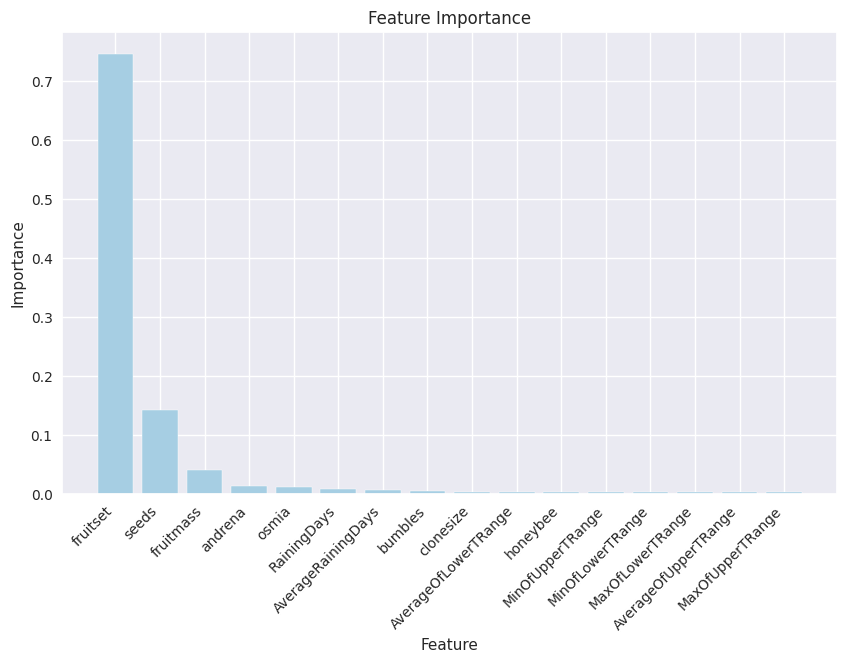

In [47]:
# create a bar plot
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
ax.set_xticklabels(feature_importance_df['Feature'], rotation=45, ha='right')
ax.set_title('Feature Importance')
ax.set_xlabel('Feature')
ax.set_ylabel('Importance')
plt.show()

### Feature importance : XGBoost Regressor

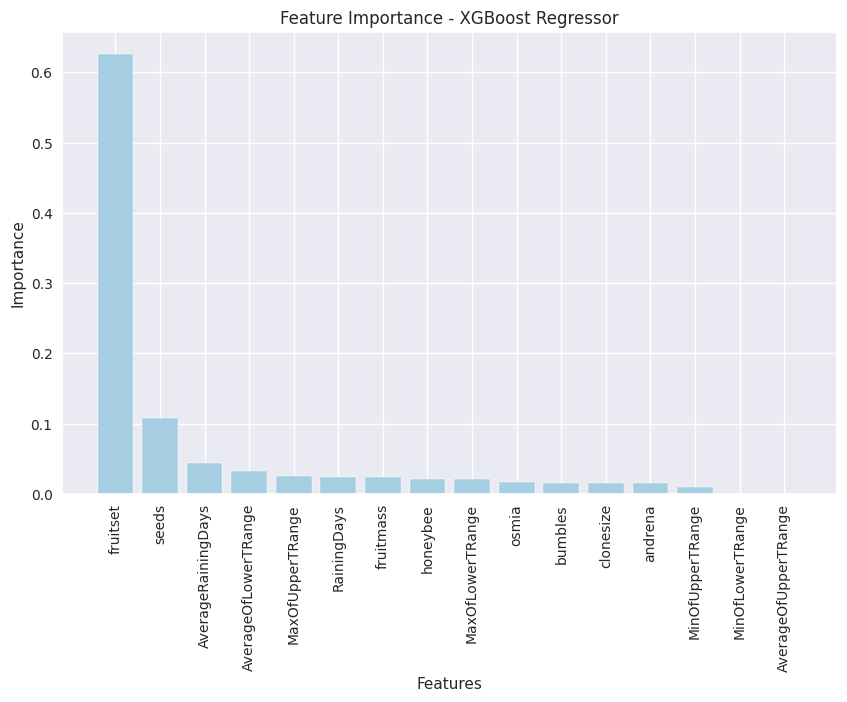

In [48]:
# Create an instance of XGBRegressor
xgbr = xgb.XGBRegressor()

# Fit the model on your training data
xgbr.fit(X_Train_train_std, y_Train_train_std)

# Get feature importances
importance = xgbr.feature_importances_

# Get feature names
feature_names = X_Train_train_std.columns

# Sort feature importances in descending order
indices = importance.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - XGBoost Regressor")
plt.bar(range(X_Train_train_std.shape[1]), importance[indices])
plt.xticks(range(X_Train_train_std.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


### Feature importance: ElasticNet Regression

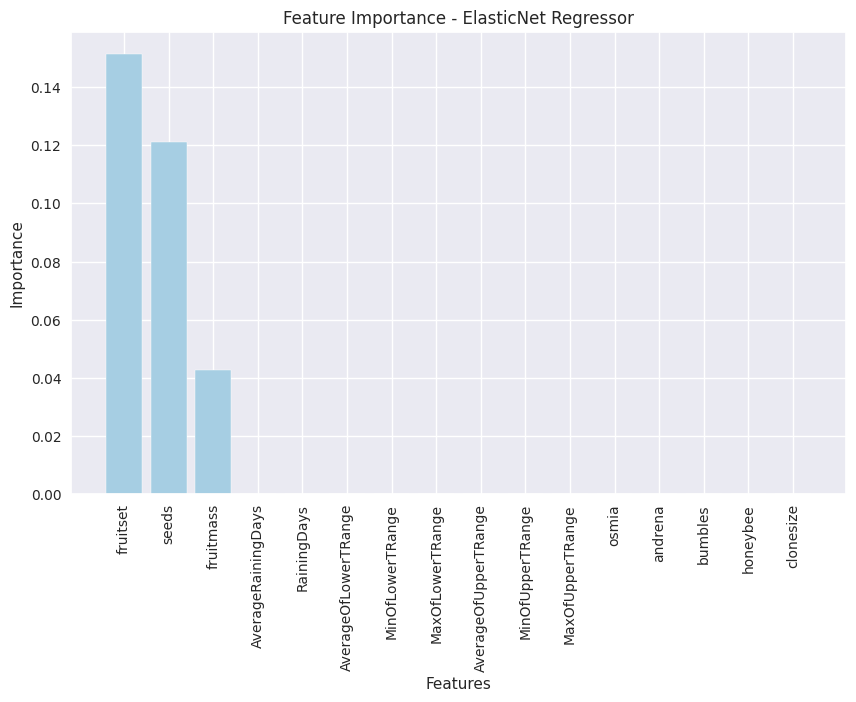

In [49]:
# Create an instance of ElasticNet regressor
elasticnet = ElasticNet()

# Fit the model on your training data
elasticnet.fit(X_Train_train_std, y_Train_train_std)

# Get absolute coefficients (importance)
importance = np.abs(elasticnet.coef_)

# Get feature names
feature_names = X_Train_train_std.columns

# Sort feature importances in descending order
indices = importance.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - ElasticNet Regressor")
plt.bar(range(X_Train_train_std.shape[1]), importance[indices])
plt.xticks(range(X_Train_train_std.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


In [50]:
## Selected Features to build model

selected =['fruitset','seeds','fruitmass']
Selected_train = X_Train_train_std[selected]
Selected_test = X_Train_test_std[selected]

##PCA


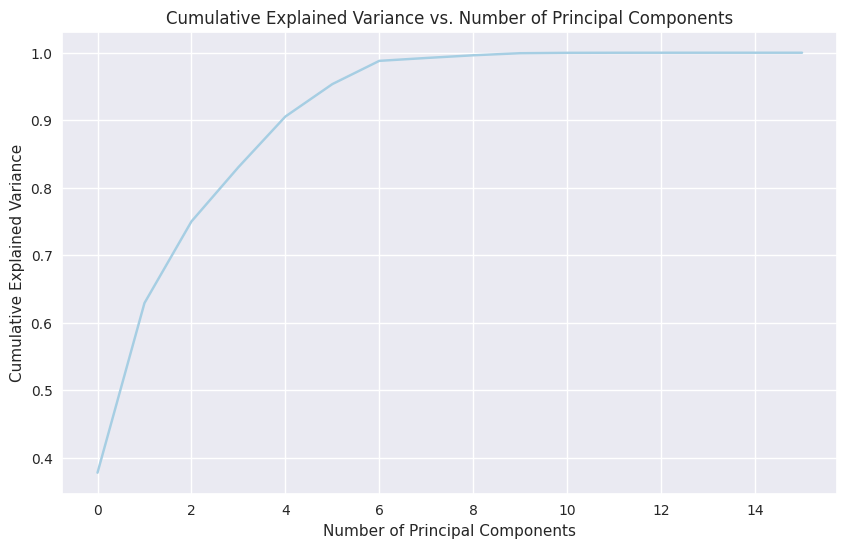

In [51]:
# Create an instance of PCA
pca = PCA()

# Fit PCA on your standardized training data
pca.fit(X_Train_train_std)

# Transform the training data to the principal components
X_train_pca = pca.transform(X_Train_train_std)

# Access explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Plot explained variance ratios
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratios))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()

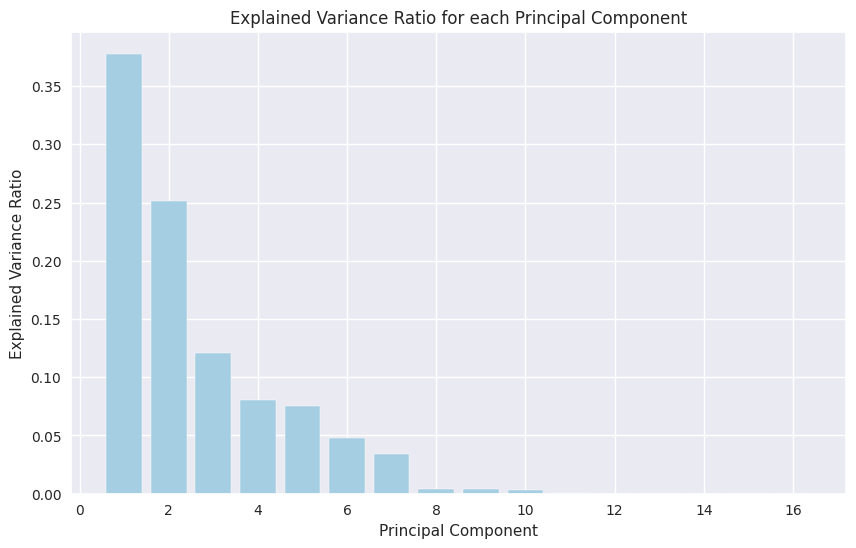

In [52]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for each Principal Component')
plt.show()

### Testing the PCA model 

In [53]:
#transform test data
X_test_pca = pca.transform(X_Train_test_std)


In [54]:
# Calculate mean squared error (MSE)
mse = mean_squared_error(y_Train_test_std, y_pred)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_Train_test_std, y_pred)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_Train_test_std, y_pred)

In [55]:
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.19008380751572107
Mean Absolute Error (MAE): 0.2854918754154578
R-squared (R2): 0.8104877248403438


#### Learning curve for PCA

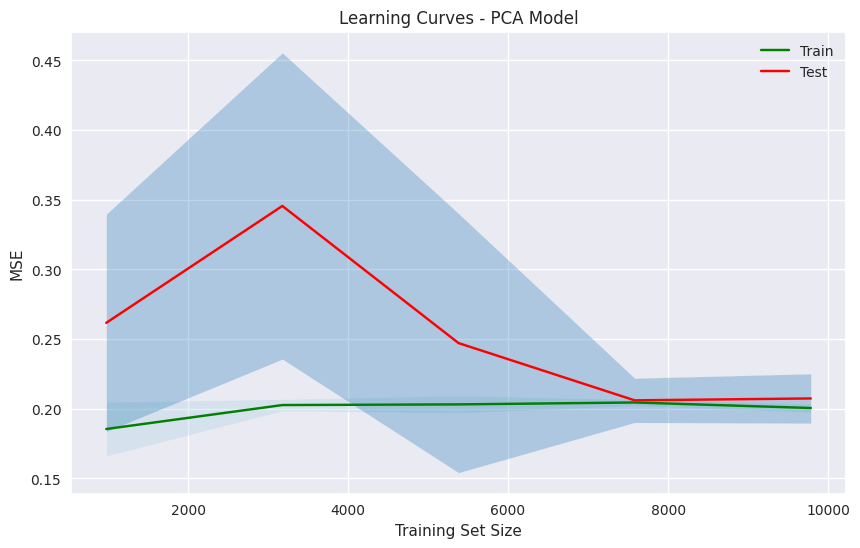

In [56]:
# Create an instance of Linear Regression (or any other regression model) : since PCA doesn't have a predict method
regressor = LinearRegression()

# Calculate learning curves
train_sizes, train_scores, test_scores = learning_curve(regressor, X_train_pca, y_Train_train_std, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
train_scores = -train_scores
test_scores = -test_scores

# Calculate mean and standard deviation of scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Train', color='green')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.3)
plt.plot(train_sizes, test_mean, label='Test',color='red')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.3)
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.title('Learning Curves - PCA Model')
plt.legend()
plt.show()

# ***Building Regressors***

## Pycaret Solution 

We wanted to know what low code can give us. 


1.   The best model was a gradient boosting regressor with an MSE of 0.18 and R2 of 0.82
2.   We then tuned this model and performed CV which gave the exact same MSE of 0.1987 and R2 of 0.8026
3. We then plotted the residuals and learning curves, which were satisfactory in nature



In [57]:
# Combine the features and targets into a single dataframe for PyCaret
Train_df = pd.concat([X_Train_train_std, y_Train_train_std], axis=1)
Test_df = pd.concat([X_Train_test_std, y_Train_test_std], axis=1)

# Assuming that the target column in your dataframe is named 'target'
target_column_name = 'yield'

# Set up the regression module
reg = setup(data=Train_df, target=target_column_name, session_id=123)

# Compare all models and check the scores
model_results = compare_models(sort='MSE', n_select=3)


Processing:   0%|          | 0/83 [00:00<?, ?it/s]

### Pycaret Grid Search

In [58]:
# Tune the model using a grid search
best_model = compare_models(sort='MSE')
tuned_model = tune_model(best_model)

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Pycaret Evaluation: Learning curves, Residuals etc.

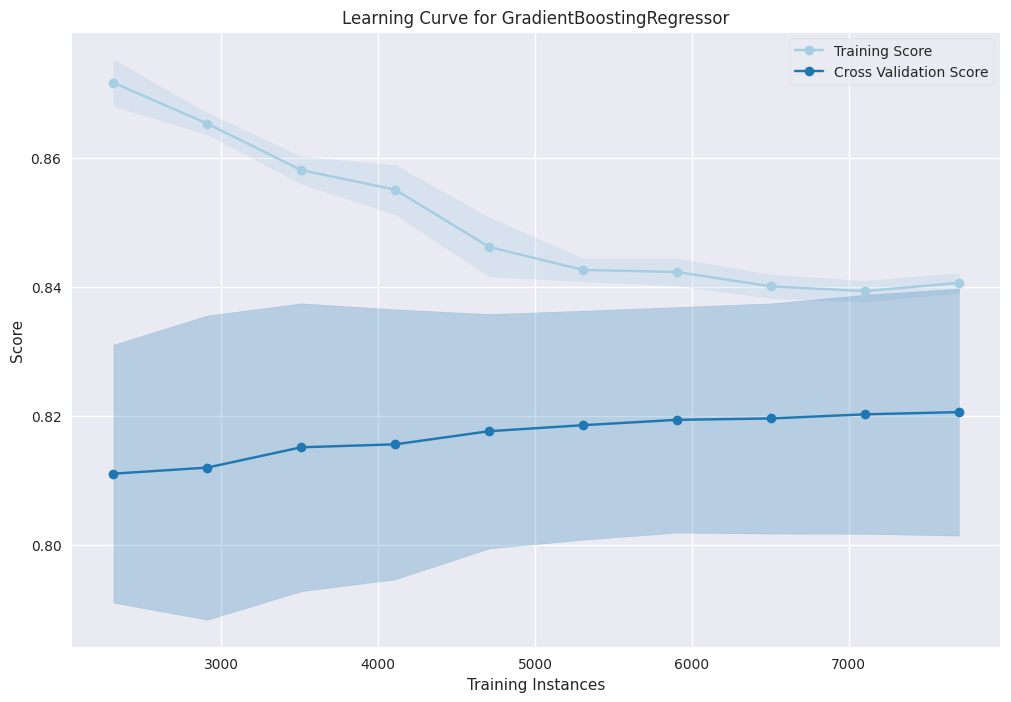

In [59]:
# Evaluate the performance of the tuned model
evaluate_model(tuned_model)



### Residual graph

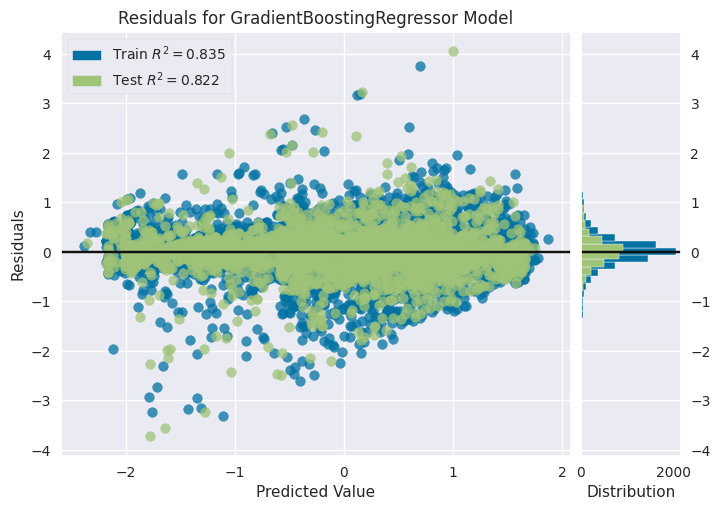

In [60]:
# Train the best model on the entire dataset
final_model = finalize_model(tuned_model)
# Generate predictions on the test dataset
predictions = predict_model(final_model, data=Test_df)

# Plot the actuals versus predicted values
plot_model(final_model, plot='residuals')

## Horse Race of Regressors

Here we are taking multiple regressors out of the box and comparing their performances on standardized data. The leaderboard is as follows:

# **Leaderboard**

Base learner regressor performance results on the holdout sample are as follows:

|**Regressor** |    MSE    |    MAE    |    R^2    |
|:----------------------|:------------:|:------------:|:------------:|
|           Ridge Regression  |3.392540e+05  |371.198433   |0.810670
|  Multiple Linear Regression  |3.392626e+05  |371.211562   |0.810665
|     ElasticNet Regression  |3.833547e+05  |438.789791   |0.786059
|                      kNN  |3.789035e+05  |408.753801   |0.788543
|Multilayer Perceptron  |3.503487e+05  |382.181197   |0.804479
|          Decision Tree  |6.783415e+05  |526.786215   |0.621433
|            Lasso Regression  |7.784511e+05  |707.145180   |0.565564
|                     SVR  |2.711572e+06  |799.959226  |-0.513265


Ensemble and deep learner regressor performance results on the holdout sample are as follows:

|**Regressor** |    MSE    |    MAE    |    R^2    |
|:----------------------|:------------:|:------------:|:------------:|
|    Stacked Ensemble  |320849.707544  |357.387963   |0.820941
  |            XGBoost  |348716.497900  |380.183229  | 0.805389
  |     Random Forest  |357782.720460  |387.349825  | 0.800330
 |         AdaBoost  |738328.590626  |619.151894   |0.587956
  |Keras Deep Learning  |949925.631743|  476.780540|   0.469869


### Actuals V/S predictions for Base regressors

In [61]:
# Report performance
def Performance(actuals,predictions):
  print('MSE: %.2f ' % mean_squared_error(actuals, predictions))
  print('MAE: %.2f ' % mean_absolute_error(actuals,predictions)) 
  print('R^2: %.2f' % r2_score(actuals, predictions))

# Plotting the actuals vs predictions 
def PredsVsActuals(actuals,predictions):
  plt.plot(actuals, predictions, '.', color='blue')
  plt.xlabel('Actuals')
  plt.ylabel('Predi ctions')
  plt.show()

REGRESSOR:  Multiple Linear Regression 

Coefficients: 
 [ 0.72764633  0.42768023 -0.26359891]
MSE: 339262.55 
MAE: 371.21 
R^2: 0.81


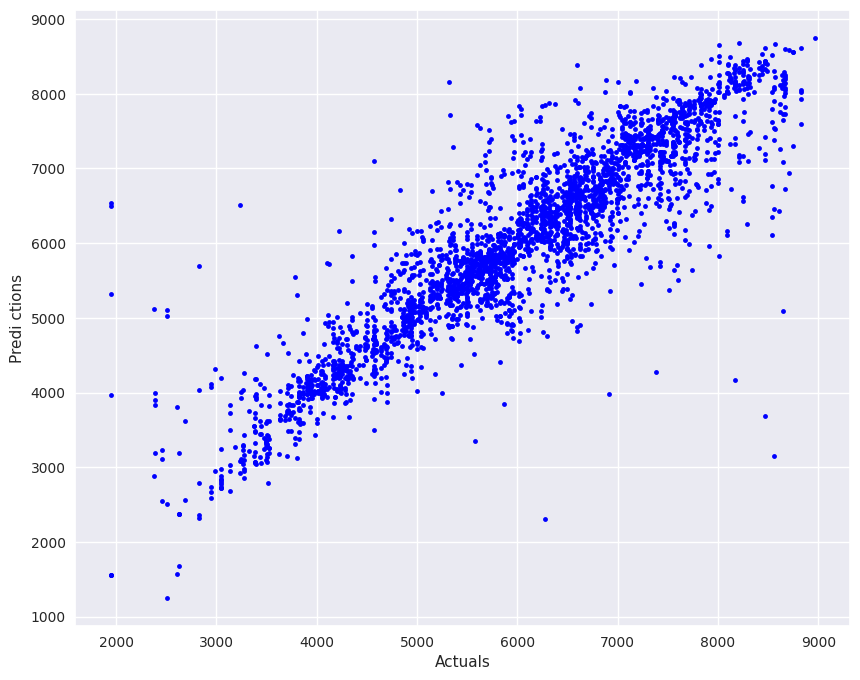

Maximum error:  350409409.1968527 %


REGRESSOR:  Lasso Regression 

Coefficients: 
 [0.33015769 0.05394941 0.        ]
MSE: 778451.14 
MAE: 707.15 
R^2: 0.57


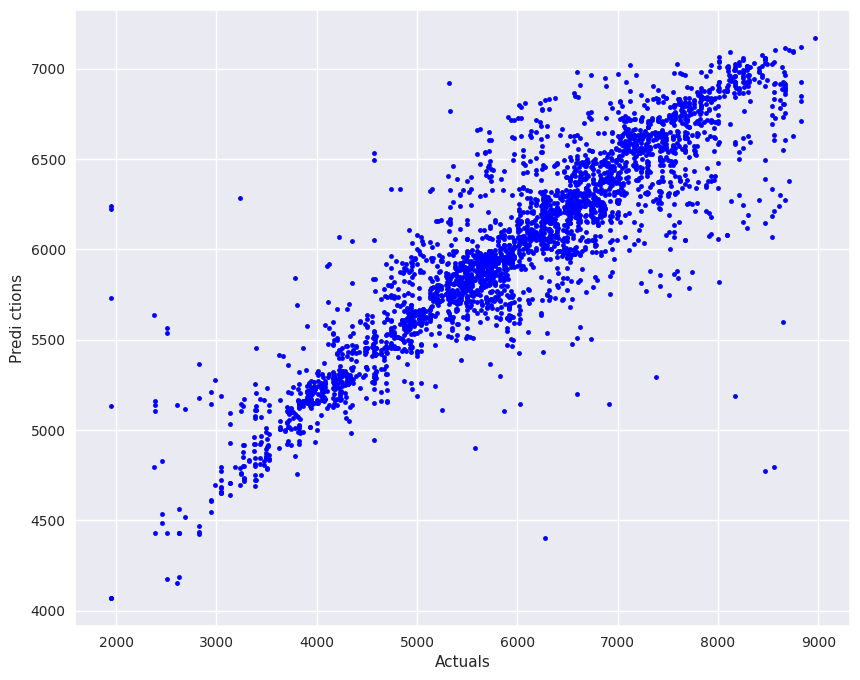

Maximum error:  343857061.97777766 %


REGRESSOR:  Ridge Regression 

Coefficients: 
 [ 0.72734507  0.4276061  -0.26323595]
MSE: 339253.99 
MAE: 371.20 
R^2: 0.81


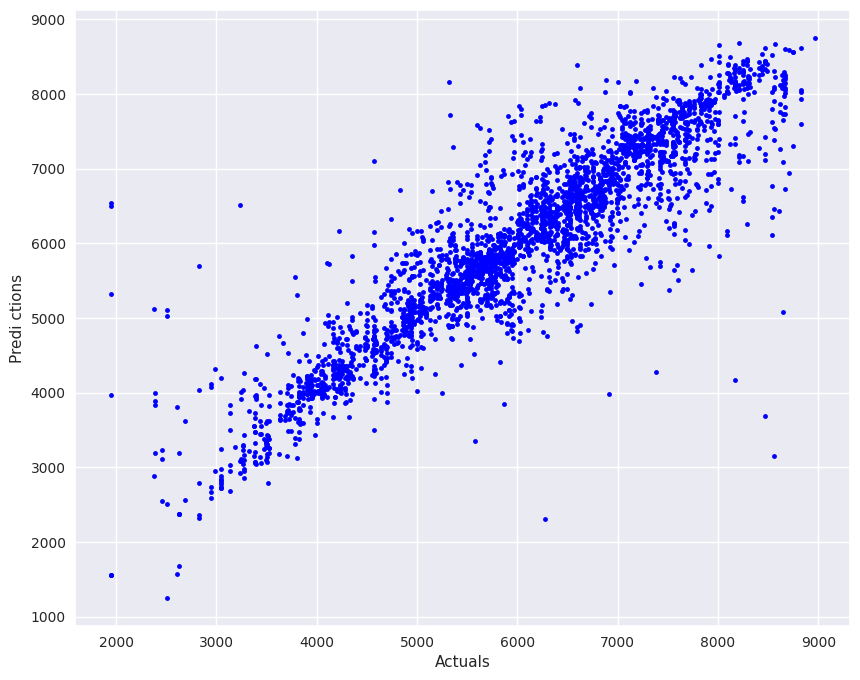

Maximum error:  350413724.8752596 %


REGRESSOR:  ElasticNet Regression 

Coefficients: 
 [0.38214455 0.29129766 0.05625645]
MSE: 383354.68 
MAE: 438.79 
R^2: 0.79


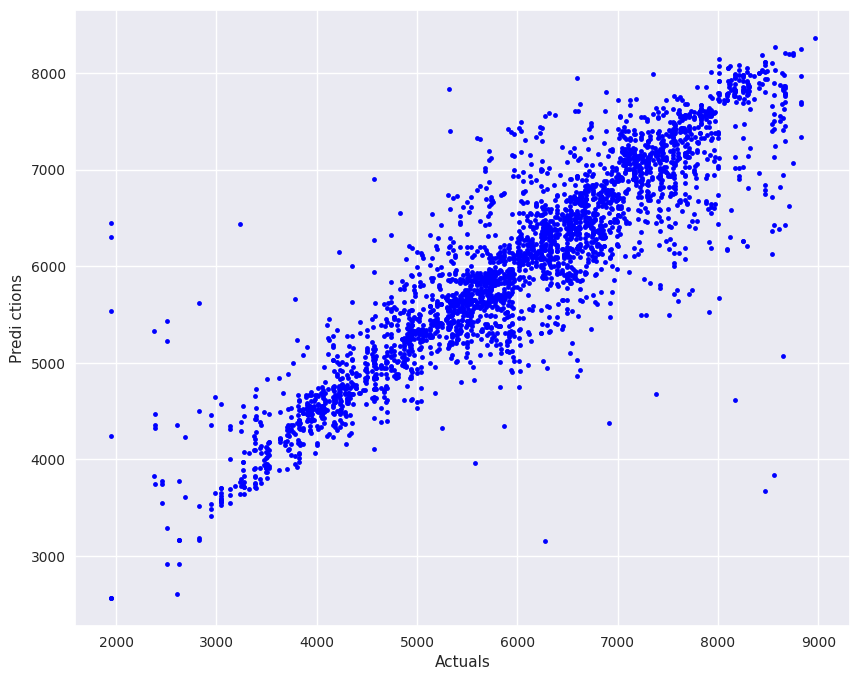

Maximum error:  351419268.9463132 %


REGRESSOR:  kNN 

MSE: 378903.51 
MAE: 408.75 
R^2: 0.79


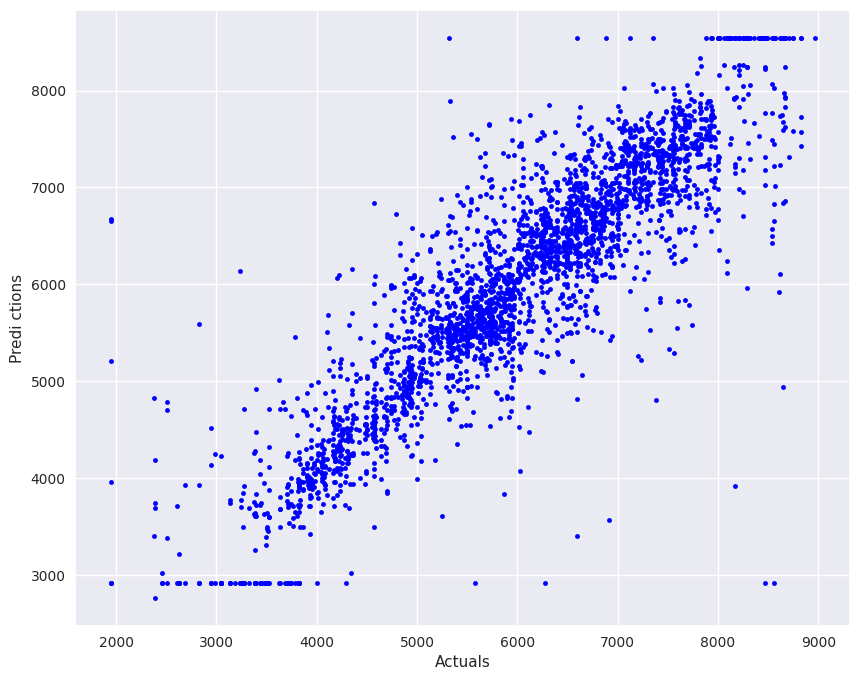

Maximum error:  358167352.2296553 %


REGRESSOR:  SVR 

MSE: 2711571.75 
MAE: 799.96 
R^2: -0.51


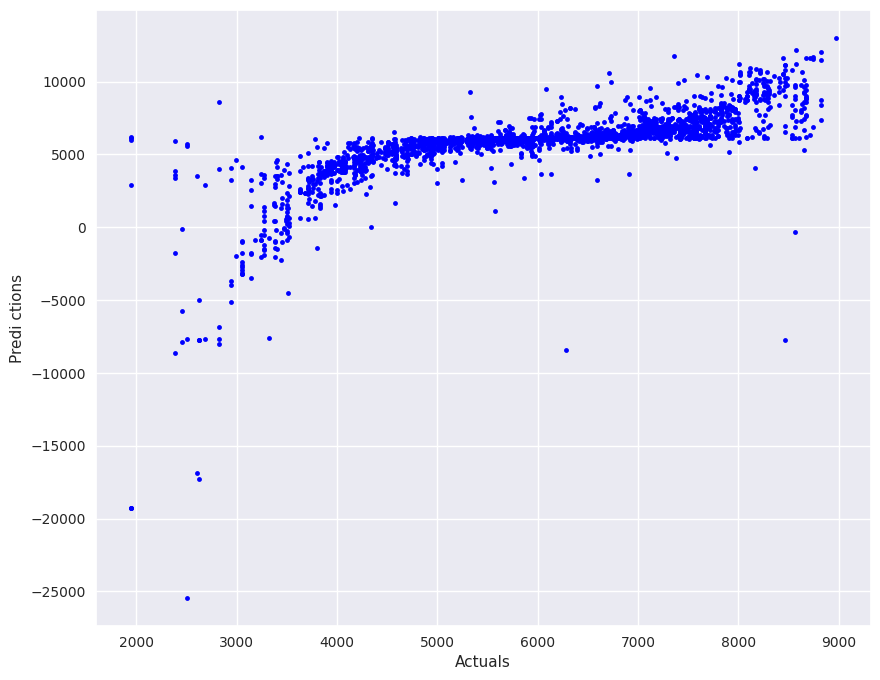

Maximum error:  342826114.6059448 %


REGRESSOR:  Decision Tree 

MSE: 678341.54 
MAE: 526.79 
R^2: 0.62


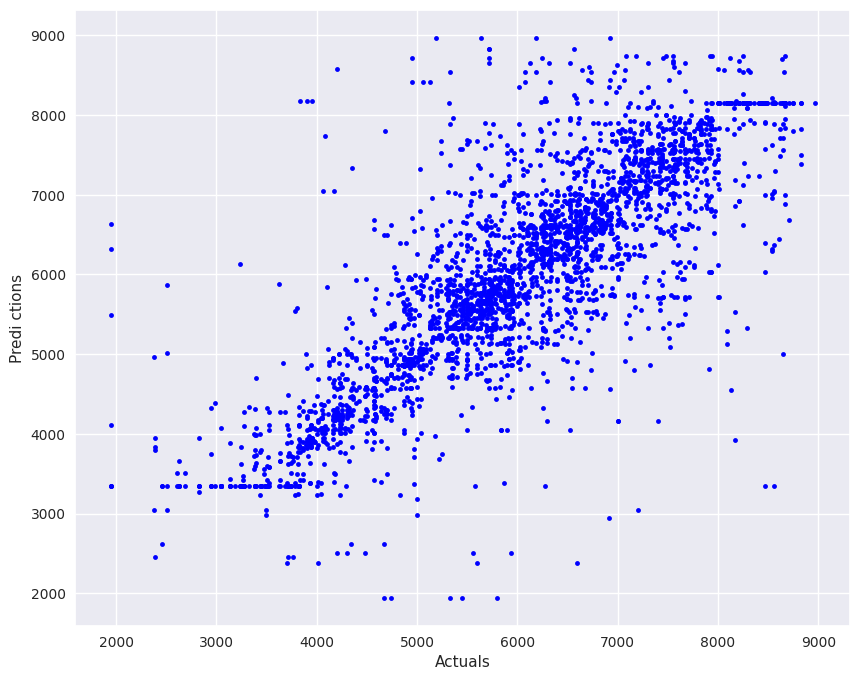

Maximum error:  369101796.11166 %


REGRESSOR:  Multilayer Perceptron 

MSE: 350348.65 
MAE: 382.18 
R^2: 0.80


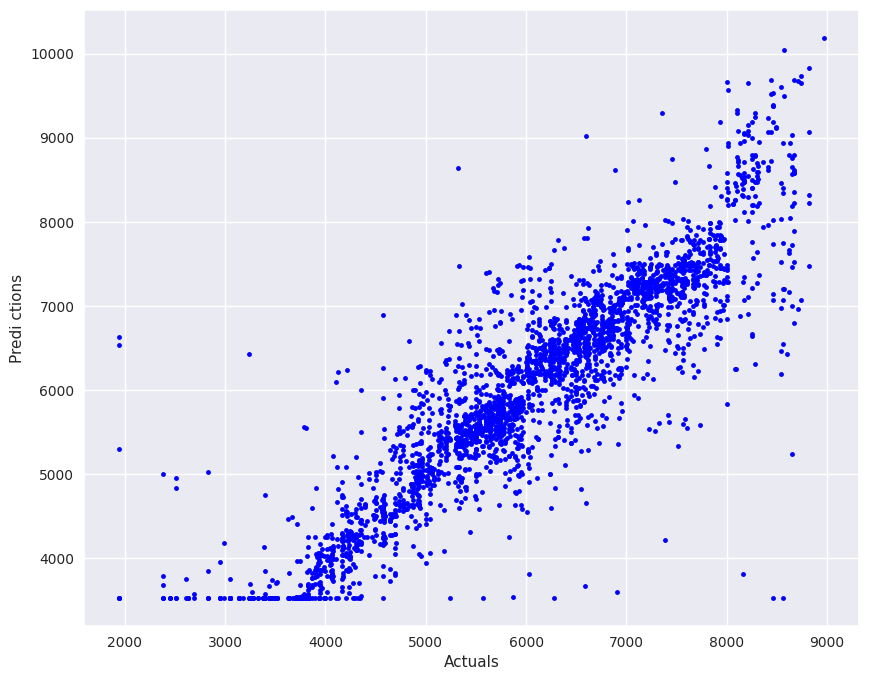

Maximum error:  355082957.9115658 %




In [62]:
# Initialize empty lists to store metric scores
mse_scores = []
mae_scores = []
r2_scores = []

# Loop through base learners
names = ['Multiple Linear Regression', 'Lasso Regression', 'Ridge Regression','ElasticNet Regression','kNN', 'SVR','Decision Tree','Multilayer Perceptron']
regressors = [linear_model.LinearRegression(),
              Lasso(alpha=0.5),
              Ridge(alpha=0.5),
              ElasticNet(alpha=0.25, l1_ratio=0.5),
              KNeighborsRegressor(n_neighbors=5),
              SVR(kernel = 'poly'),   #Can try kernels 'poly', 'linear' and 'sigmoid' kernels
              DecisionTreeRegressor(),
              MLPRegressor(hidden_layer_sizes=(150,150,1),
                       max_iter = 300,activation = 'relu',         
                       solver = 'adam')] 

for name, regr in zip(names, regressors):
  print('REGRESSOR: ',name,'\n')
  regr.fit(Selected_train, np.ravel(y_Train_train_std))

  # Make predictions 
  y_pred_std = regr.predict(Selected_test)
  y_pred_std = pd.DataFrame(y_pred_std)
  y_pred = stdsc2.inverse_transform(y_pred_std)
 
  # Calculate the evaluation metrics
  mse = mean_squared_error(y_Train_test, y_pred)
  mae = mean_absolute_error(y_Train_test, y_pred)
  r2 = r2_score(y_Train_test, y_pred)
    
  # Append the scores to the respective lists
  mse_scores.append(mse)
  mae_scores.append(mae)
  r2_scores.append(r2)
  
  if name in ['Multiple Linear Regression', 'Lasso Regression', 'Ridge Regression','ElasticNet Regression']:
      print('Coefficients: \n', regr.coef_)

  # Performance
  plt.figure(figsize=(10,8))
  Performance(y_Train_test,y_pred)
  PredsVsActuals(y_Train_test,y_pred)

  # Worst-case instance prediction
  y_pred = pd.DataFrame(y_pred) 
  results = pd.concat([y_pred, pd.DataFrame(y_Train_test_std).set_index(y_pred.index)], axis=1)
  results.columns=['Pred','Act']
  results['error'] = (results.Pred - results.Act)/results.Act
  print('Maximum error: ',100*np.max(results.error),'%\n\n')


# Create a DataFrame to store the metric scores
metrics_df = pd.DataFrame({
    'Algorithm': names,
    'MSE': mse_scores,
    'MAE': mae_scores,
    'R-squared': r2_scores
})



In [63]:
algorithms = {
    'Multiple Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'ElasticNet Regression': ElasticNet(),
    'kNN': KNeighborsRegressor(),
    'SVR': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Multilayer Perceptron': MLPRegressor()
}


### Metrics Table

In [64]:
# Print the metrics table
print("Metrics Table:")
print(metrics_df)

Metrics Table:
                    Algorithm           MSE         MAE  R-squared
0  Multiple Linear Regression  3.392626e+05  371.211562   0.810665
1            Lasso Regression  7.784511e+05  707.145180   0.565564
2            Ridge Regression  3.392540e+05  371.198433   0.810670
3       ElasticNet Regression  3.833547e+05  438.789791   0.786059
4                         kNN  3.789035e+05  408.753801   0.788543
5                         SVR  2.711572e+06  799.959226  -0.513265
6               Decision Tree  6.783415e+05  526.786215   0.621433
7       Multilayer Perceptron  3.503487e+05  382.181197   0.804479


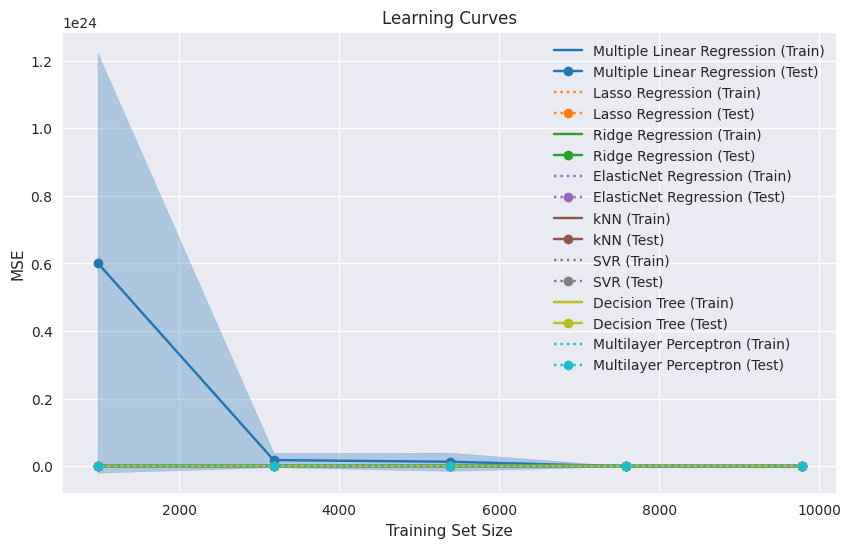

In [65]:

# Define a color map for the learning curves
colors = plt.cm.tab10(np.linspace(0, 1, len(algorithms)))

# Create a list of line styles for train and test lines
line_styles = ['-', ':']

# Plotting learning curves for each algorithm
plt.figure(figsize=(10, 6))
for i, (name, algorithm) in enumerate(algorithms.items()):
    # Calculate learning curves
    train_sizes, train_scores, test_scores = learning_curve(algorithm, X_Train_train_std, y_Train_train_std, cv=5, scoring='neg_mean_squared_error')

    # Convert negative MSE scores to positive
    train_scores = -train_scores
    test_scores = -test_scores

    # Calculate mean and standard deviation of scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot learning curves with unique color for each algorithm
    plt.plot(train_sizes, train_mean, label=name + ' (Train)', linestyle=line_styles[i % len(line_styles)], color=colors[i])
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.3, color=colors[i])
    plt.plot(train_sizes, test_mean, label=name + ' (Test)', linestyle=line_styles[i % len(line_styles)], color=colors[i], marker='o')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.3, color=colors[i])

plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.title('Learning Curves')
plt.legend()
plt.show()

##Ensembles

In [66]:
# Stacked Ensemble
# Code in this snippet adapted from https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

# get a stacking ensemble of models
def get_stacking():
  # define the base models
  level0 = list()
  level0.append(('MLR', linear_model.LinearRegression()))
  level0.append(('Ridge', Ridge(alpha=0.5)))
  level0.append(('RF', RandomForestRegressor()))
  level0.append(('XGB', XGBRegressor(objective ='reg:squarederror')))
  # define meta learner model
  level1 = linear_model.LinearRegression()
  # define the stacking ensemble
  model = StackingRegressor(estimators=level0, final_estimator=level1, cv=10)
  return model
 
# get a list of models to evaluate
def get_models():
  models = dict()
  models['Multiple Linear Regression'] = linear_model.LinearRegression()
  models['Ridge Regression'] = Ridge(alpha=0.5)
  models['Random Forest'] = RandomForestRegressor()
  models['XGBoost'] = XGBRegressor(objective ='reg:squarederror')
  models['Stacked Ensemble'] = get_stacking()
  return models

In [67]:
# Keras Deep Learning model definition
def BuildModel():
 model = Sequential()
 model.add(Dense(50, input_dim=3,activation='relu')) 
 model.add(Dense(50, activation='relu')) 
 model.add(Dense(1,activation='linear'))
 model.compile(loss="mean_squared_error", optimizer="adam")   
 return model

In [68]:
# Report performance
def Performance(actuals,predictions):
  print('MSE: %.2f ' % mean_squared_error(actuals, predictions))
  print('MAE: %.2f ' % mean_absolute_error(actuals,predictions)) 
  print('R^2: %.2f' % r2_score(actuals, predictions))

# Plotting the actuals vs predictions 
def PredsVsActuals(actuals,predictions):
  plt.plot(actuals, predictions, '.', color='blue')
  plt.xlabel('Actuals')
  plt.ylabel('Predictions')
  plt.show()

### Actuals V/S predictions for Ensembles 

Along with metrics

REGRESSOR:  Random Forest 

MSE: 357330.87 
MAE: 387.94 
R^2: 0.80


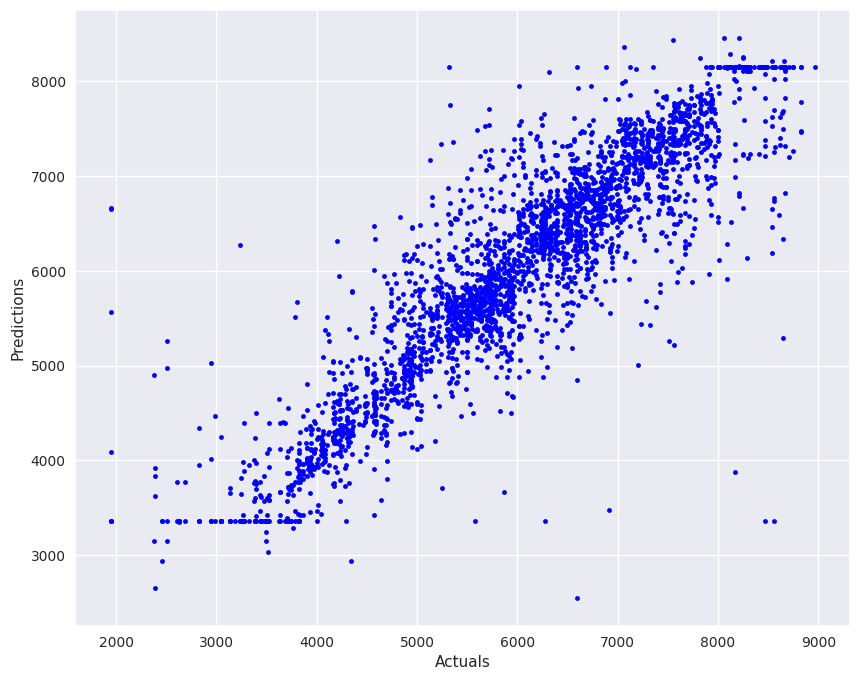

Maximum error:  242.3081609494697 %


REGRESSOR:  XGBoost 

MSE: 348716.50 
MAE: 380.18 
R^2: 0.81


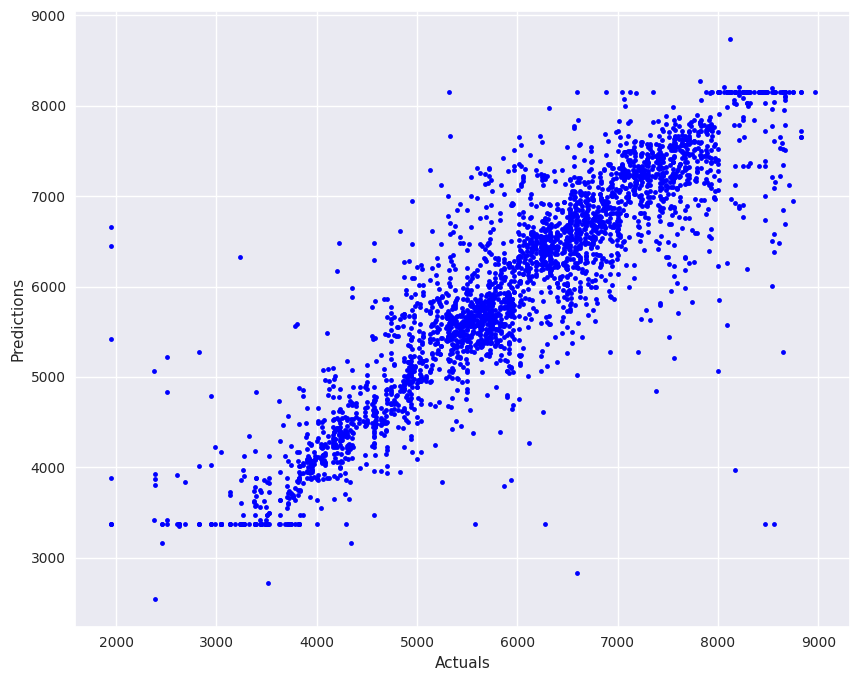

Maximum error:  242.02726407823008 %


REGRESSOR:  AdaBoost 

MSE: 575082.17 
MAE: 546.20 
R^2: 0.68


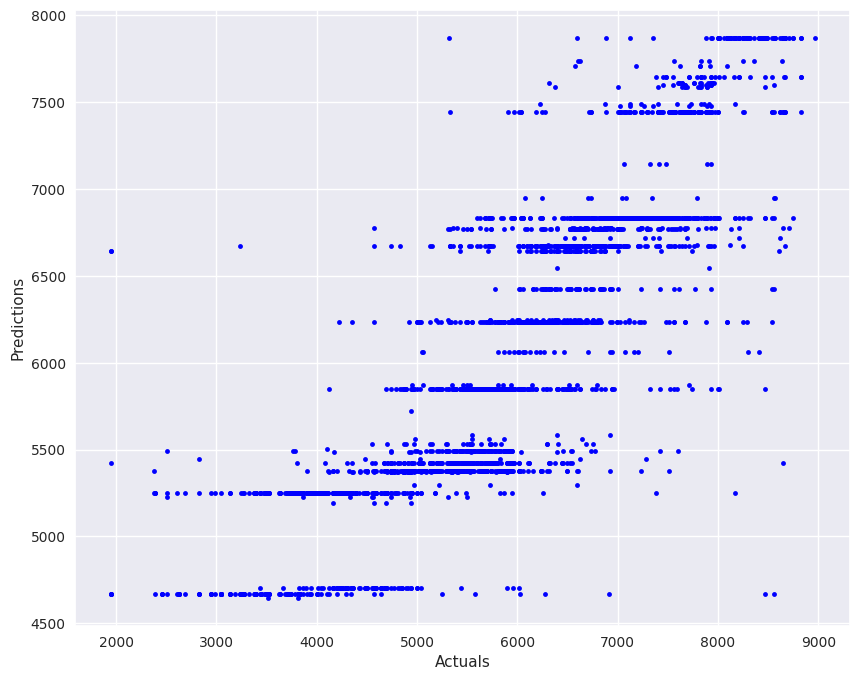

Maximum error:  241.60529306695864 %


REGRESSOR:  Keras Deep Learning 

MSE: 656285.26 
MAE: 442.03 
R^2: 0.63


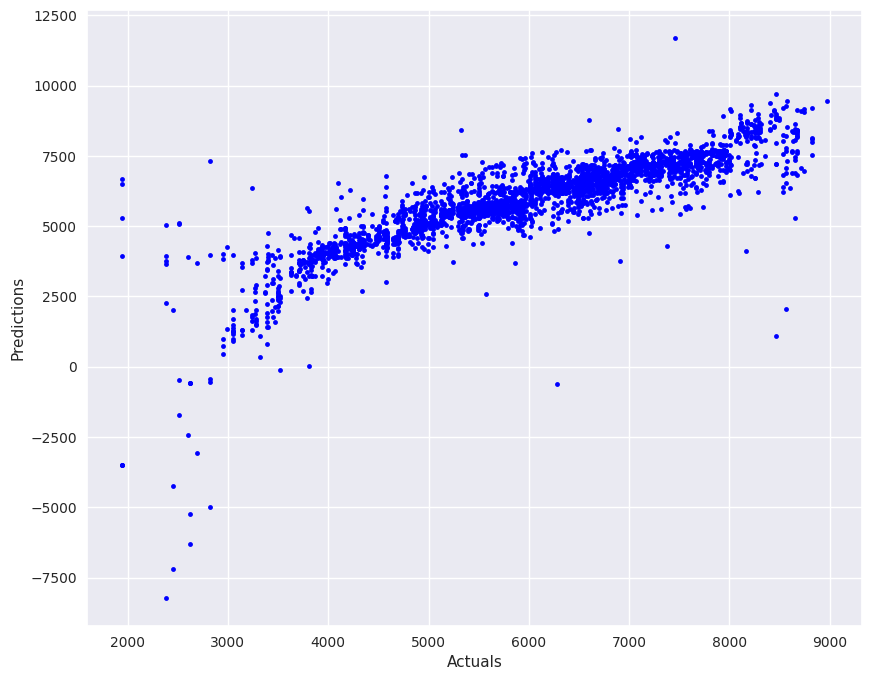

Maximum error:  242.95188430464995 %


REGRESSOR:  Stacked Ensemble 

MSE: 320539.64 
MAE: 357.36 
R^2: 0.82


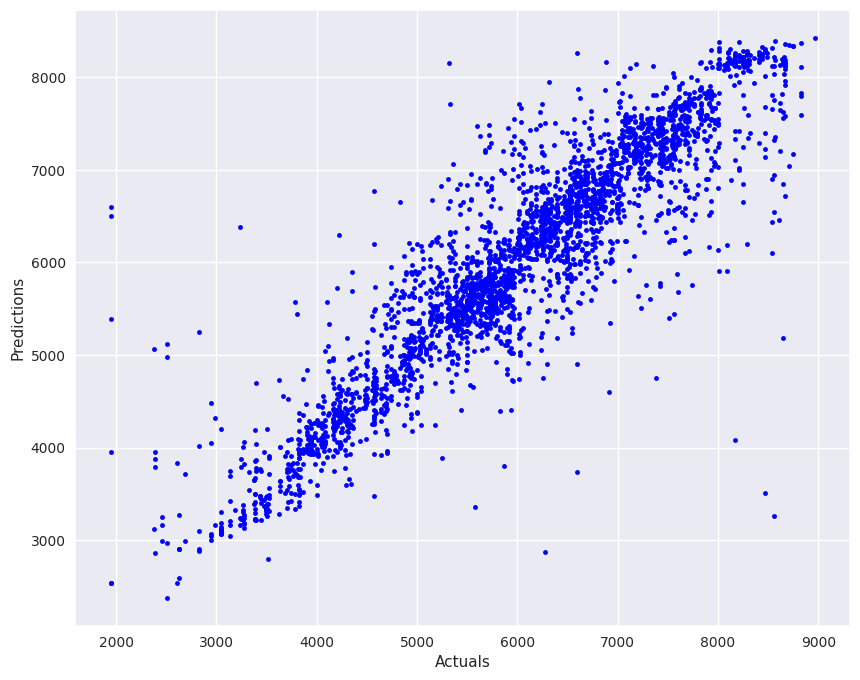

Maximum error:  239.23310423456527 %


REGRESSOR:  Random Forest 

REGRESSOR:  XGBoost 

REGRESSOR:  AdaBoost 

REGRESSOR:  Keras Deep Learning 

REGRESSOR:  Stacked Ensemble 



In [69]:
# Initialize empty lists to store metric scores
mse_scores = []
mae_scores = []
r2_scores = []

# Loop through ensembles and deep learning model
names = ['Random Forest', 'XGBoost', 'AdaBoost','Keras Deep Learning','Stacked Ensemble']
regressors = [RandomForestRegressor(),
              XGBRegressor(objective ='reg:squarederror'),
              AdaBoostRegressor(),
              KerasRegressor(build_fn=BuildModel,nb_epoch=500,epochs=500, batch_size=20,verbose=0),
              get_stacking()   
              ] 

for name, regr in zip(names, regressors):
  print('REGRESSOR: ',name,'\n')
  regr.fit(Selected_train, np.ravel(y_Train_train_std))
  
  # Make predictions 
  y_pred_std = regr.predict(Selected_test)
  y_pred_std = pd.DataFrame(y_pred_std)
  y_pred = stdsc2.inverse_transform(y_pred_std)
  # Performance
   # Calculate the evaluation metrics
  mse = mean_squared_error(y_Train_test, y_pred)
  mae = mean_absolute_error(y_Train_test, y_pred)
  r2 = r2_score(y_Train_test, y_pred)
  # Append the scores to the respective lists
  mse_scores.append(mse)
  mae_scores.append(mae)
  r2_scores.append(r2)

  plt.figure(figsize=(10,8))
  Performance(y_Train_test,y_pred)
  PredsVsActuals(y_Train_test,y_pred)
  # Worst-case instance prediction
  y_pred = pd.DataFrame(y_pred) 
  y_test = pd.DataFrame(y_Train_test)
  results = pd.concat([y_pred, y_Train_test.set_index(y_pred.index)], axis=1)
  results.columns=['Pred','Act']
  results['error'] = (results.Pred - results.Act)/results.Act
  print('Maximum error: ',100*np.max(results.error),'%\n\n')
   
# Create a DataFrame to store the metric scores
metrics_df = pd.DataFrame({
    'Algorithm': names,
    'MSE': mse_scores,
    'MAE': mae_scores,
    'R-squared': r2_scores
})

# Loop through ensembles and deep learning model
names = ['Random Forest', 'XGBoost', 'AdaBoost','Keras Deep Learning','Stacked Ensemble']
regressors = [RandomForestRegressor(),
              XGBRegressor(objective ='reg:squarederror'),
              AdaBoostRegressor(),
              KerasRegressor(build_fn=BuildModel,nb_epoch=500,epochs=500, batch_size=20,verbose=0),
              get_stacking()   
              ] 

for name, regr in zip(names, regressors):
  print('REGRESSOR: ',name,'\n')
  regr.fit(Selected_train, np.ravel(y_Train_train_std))
  # Make predictions 
  y_pred_std = regr.predict(Selected_test)
  y_pred_std = pd.DataFrame(y_pred_std)
  y_pred = stdsc2.inverse_transform(y_pred_std)
 

### Metrics table (Ensembles)


In [70]:
# Print the metrics table
print("Metrics Table:")
print(metrics_df)

Metrics Table:
             Algorithm            MSE         MAE  R-squared
0        Random Forest  357330.873988  387.939357   0.800582
1              XGBoost  348716.497900  380.183229   0.805389
2             AdaBoost  575082.172061  546.199660   0.679060
3  Keras Deep Learning  656285.256108  442.027207   0.633742
4     Stacked Ensemble  320539.643895  357.362343   0.821114


### Grid Searching Stacked ensemble to see if there is a better performance.

Please note: This particular section may take hours to run since its a grid search on an ensemble. It is recommended to run this section at last since and move onto learning curves for now since this is not our winning model anyway.

In [71]:
##Grid searching Stacked Ensemble

# Define the stacked ensemble model
model = get_stacking()

# Define the parameter grid for grid search
param_grid = {
    'final_estimator__fit_intercept': [True, False],
    'final_estimator__copy_X': [True, False],
    'final_estimator__positive': [True, False]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=10)
grid_search.fit(Selected_train, y_Train_train_std)

# Get the best model from grid search
best_model = grid_search.best_estimator_

#### Stacked Ensemble Metrics

In [72]:
# Make predictions on the training set
y_train_pred = best_model.predict(Selected_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_Train_test_std, y_train_pred)
mae = mean_absolute_error(y_Train_test_std, y_train_pred)
r2 = r2_score(y_Train_test_std, y_train_pred)

# Print evaluation metrics
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)


MSE: 0.17991865793788012
MAE: 0.26756411350423365
R^2: 0.8206223104687147


Best Parameters: {'final_estimator__copy_X': False, 'final_estimator__fit_intercept': True, 'final_estimator__positive': True}


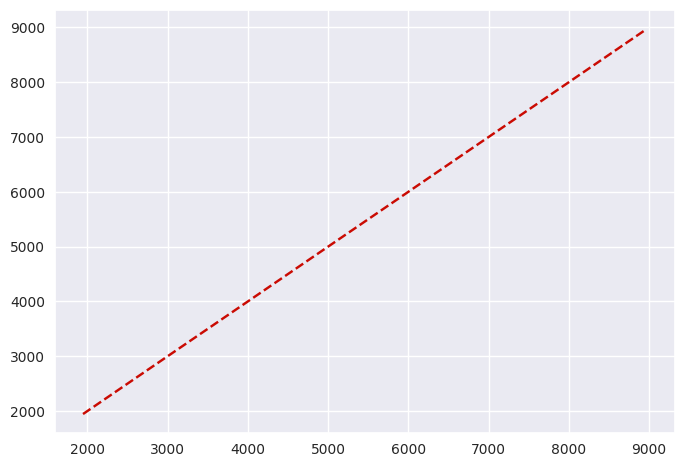

In [73]:
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

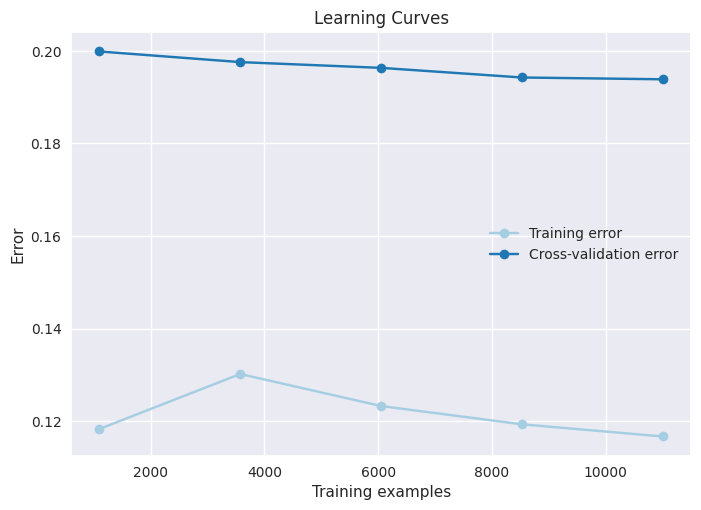

In [74]:
# Generate learning curves for tunes stacked ensemble
train_sizes, train_scores, test_scores = learning_curve(best_model, Selected_train, y_Train_train_std, cv=10, scoring='neg_mean_squared_error')
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

# Plot learning curves
plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training error")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation error")
plt.xlabel("Training examples")
plt.ylabel("Error")
plt.legend(loc="best")
plt.title("Learning Curves")
plt.show()

## Learning Curves

### Learning Curve: Horse Race Regressors

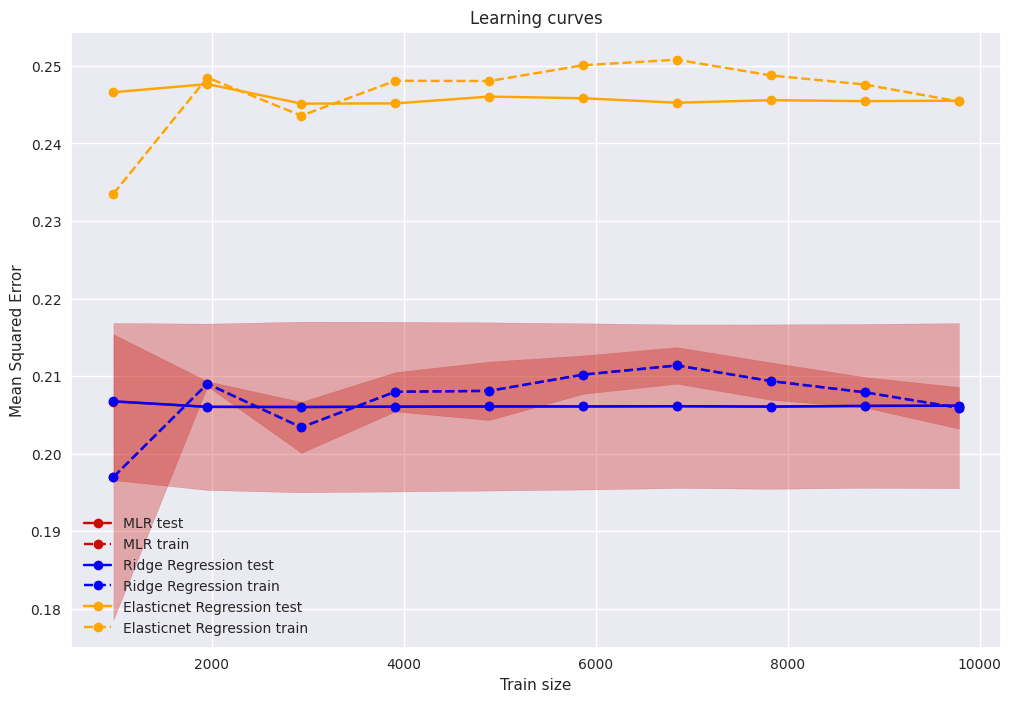

In [75]:
train_size = 0.2 * len(Selected_train)

# Learning Curves for multiple lnear regerssion, LASSO regression, ridge regression, and elasticnet regression
# MLR = Pipeline(steps=[['scaler', StandardScaler()],    
#                       ['regressor', linear_model.LinearRegression()]])

lasso = imbpipeline(steps = [['scaler', StandardScaler()],    
                                ['regressor',Lasso(alpha=0.5)]])

ridge = imbpipeline(steps = [['scaler', StandardScaler()],    
                                ['regressor', Ridge(alpha=0.5)]])

elasticnet = imbpipeline(steps = [['scaler', StandardScaler()],    
                                ['regressor', ElasticNet(alpha=0.25, l1_ratio=0.5)]])

# The train and test scores for MLR are calculated using learning_curve. 
# However, since learning_curve does not provide individual train and test scores for each fold, we can instead use cross_val_score to calculate the scores separately.


MLR = Pipeline(steps=[['scaler', StandardScaler()],    
                      ['regressor', linear_model.LinearRegression()]])

train_sizes, train_scores_MLR, test_scores_MLR = learning_curve(
    MLR,
    Selected_train,
    y_Train_train_std,
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=5,
)

# Calculate mean and standard deviation of train and test scores
train_mean_MLR = -np.mean(train_scores_MLR, axis=1)
train_std_MLR = -np.std(train_scores_MLR, axis=1)
test_mean_MLR = -np.mean(test_scores_MLR, axis=1)
test_std_MLR = -np.std(test_scores_MLR, axis=1)


train_sizes_abs, train_scores_lasso, test_scores_lasso = learning_curve(
    lasso,
    Selected_train,
    y_Train_train_std,
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=5,
)
train_sizes_abs, train_scores_ridge, test_scores_ridge = learning_curve(
    ridge,
    Selected_train,
    y_Train_train_std,
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=5,
)
train_sizes_abs, train_scores_elasticnet, test_scores_elasticnet = learning_curve(
    elasticnet,
    Selected_train,
    y_Train_train_std,
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=5,
)

# Figure size
plt.rcParams["figure.figsize"] = (12,8)
plt.figure()

plt.plot(train_sizes, test_mean_MLR, "o-", color="r", label="MLR test")
plt.fill_between(train_sizes, test_mean_MLR - test_std_MLR, test_mean_MLR + test_std_MLR, alpha=0.3, color="r")
plt.plot(train_sizes, train_mean_MLR, "o--", color="r", label="MLR train")
plt.fill_between(train_sizes, train_mean_MLR - train_std_MLR, train_mean_MLR + train_std_MLR, alpha=0.3, color="r")
#commenting out lasso, since it is out of the race and is not allowing us to examine others
# plt.plot(train_sizes, -test_scores_lasso.mean(1), "o-", color="g", label="LASSO Regression test")
# plt.plot(train_sizes, -train_scores_lasso.mean(1), "o--", color="g", label="LASSO Regression train")
plt.plot(train_sizes, -test_scores_ridge.mean(1), "o-", color="blue", label="Ridge Regression test")
plt.plot(train_sizes, -train_scores_ridge.mean(1), "o--", color="blue", label="Ridge Regression train")
plt.plot(train_sizes, -test_scores_elasticnet.mean(1), "o-", color="orange", label="Elasticnet Regression test")
plt.plot(train_sizes, -train_scores_elasticnet.mean(1), "o--", color="orange", label="Elasticnet Regression train")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title("Learning curves")
plt.legend(loc="best")
plt.show()

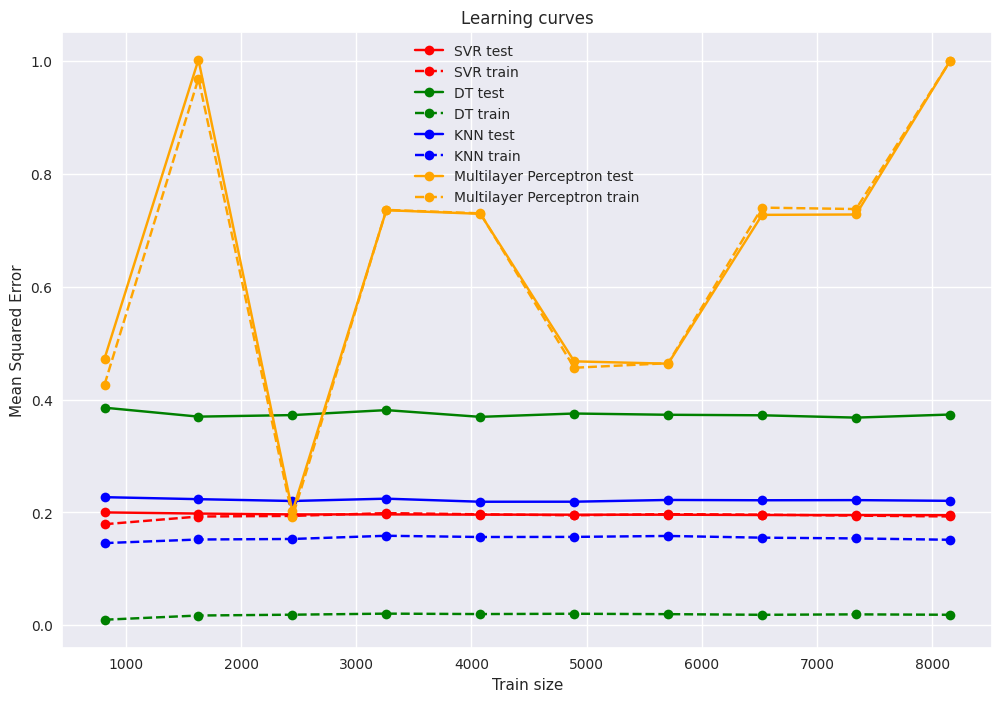

In [76]:
#Learning Curves for SVR, DecisionTreeRegressor, KNN and MLP Regressors
# *************** EXTREMELY COMPUTATIONALLY INTENSIVE (~45 min on Colab Pro) ***********************
MLP = imbpipeline(steps = [['scaler', StandardScaler()],    
                                ['regressor', MLPRegressor(hidden_layer_sizes=(25,25,1), max_iter = 1000,activation = 'relu', solver = 'adam')]])

kNN = imbpipeline(steps = [['scaler', StandardScaler()],    
                                ['regressor', KNeighborsRegressor(n_neighbors=5)]])

dt = imbpipeline(steps = [['scaler', StandardScaler()],    
                                ['regressor', DecisionTreeRegressor()]])

svr = imbpipeline(steps = [['scaler', StandardScaler()],    
                                ['regressor', SVR()]])
train_sizes, train_scores_svr, test_scores_svr = learning_curve(
    svr,
    Selected_train,
    np.ravel(y_Train_train_std),
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=3,
)
train_sizes_abs, train_scores_dt, test_scores_dt = learning_curve(
    dt,
    Selected_train,
    np.ravel(y_Train_train_std),
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=5,
)
train_sizes_abs, train_scores_kNN, test_scores_kNN = learning_curve(
    kNN,
    Selected_train,
    np.ravel(y_Train_train_std),
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=5,
)
train_sizes_abs, train_scores_MLP, test_scores_MLP = learning_curve(
    MLP,
    Selected_train,
    np.ravel(y_Train_train_std),
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=3,
)
# Figure size
plt.rcParams["figure.figsize"] = (12,8)
plt.figure()
plt.plot(train_sizes, -test_scores_svr.mean(1), "o-", color="red", label="SVR test")
plt.plot(train_sizes, -train_scores_svr.mean(1), "o--", color="red", label="SVR train")
plt.plot(train_sizes, -test_scores_dt.mean(1), "o-", color="green", label="DT test")
plt.plot(train_sizes, -train_scores_dt.mean(1), "o--", color="green", label="DT train")
plt.plot(train_sizes, -test_scores_kNN.mean(1), "o-", color="blue", label="KNN test")
plt.plot(train_sizes, -train_scores_kNN.mean(1), "o--", color="blue", label="KNN train")
plt.plot(train_sizes, -test_scores_MLP.mean(1), "o-", color="orange", label="Multilayer Perceptron test")
plt.plot(train_sizes, -train_scores_MLP.mean(1), "o--", color="orange", label="Multilayer Perceptron train")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title("Learning curves")
plt.legend(loc="best")

plt.show()

### Learning curves: Ensembes

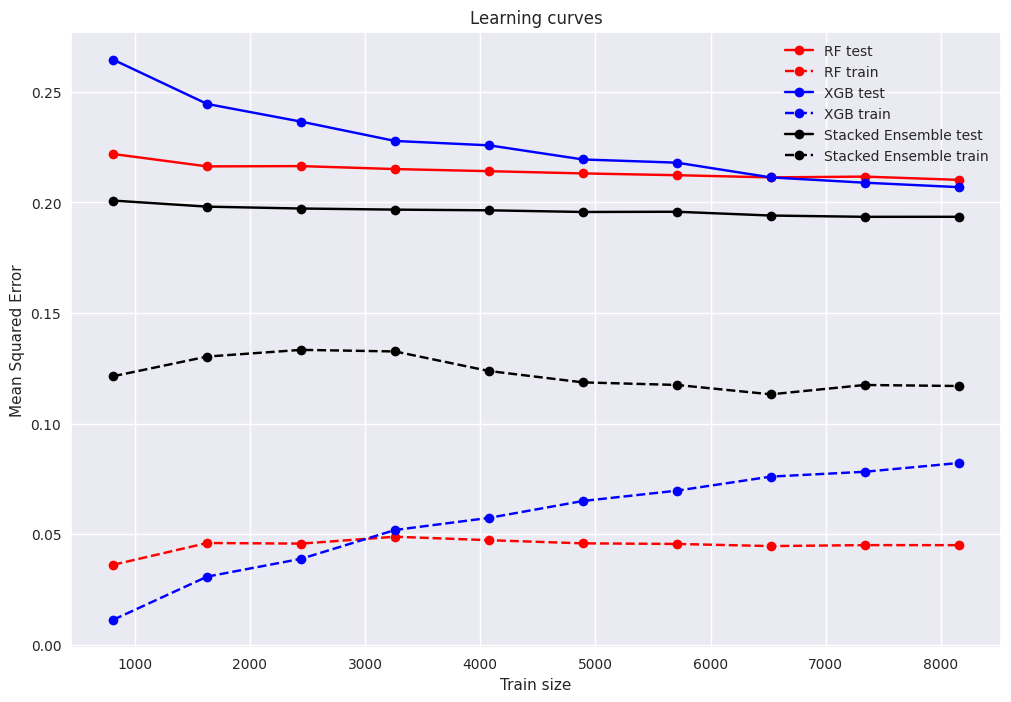

In [77]:
train_size = 0.2 * len(Selected_train)



XGB = imbpipeline(steps = [['scaler', StandardScaler()],    
                                ['regressor', XGBRegressor(objective ='reg:squarederror')]])

RF = imbpipeline(steps = [['scaler', StandardScaler()],    
                                ['regressor', RandomForestRegressor()]])

stacked_ensemble = imbpipeline(steps = [['scaler', StandardScaler()],    
                                ['regressor', get_stacking()]])   



train_sizes, train_scores_RF, test_scores_RF = learning_curve(
    RF,
    Selected_train,
    np.ravel(y_Train_train_std),
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=3,
)
train_sizes_abs, train_scores_XGB, test_scores_XGB = learning_curve(
    XGB,
    Selected_train,
    np.ravel(y_Train_train_std),
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=3,
)


train_sizes_abs, train_scores_stacked_ensemble, test_scores_stacked_ensemble = learning_curve(
    stacked_ensemble,
    Selected_train,
    np.ravel(y_Train_train_std),
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=3,
)
plt.plot(train_sizes, -test_scores_RF.mean(1), "o-", color="red", label="RF test")
plt.plot(train_sizes, -train_scores_RF.mean(1), "o--", color="red", label="RF train")
plt.plot(train_sizes, -test_scores_XGB.mean(1), "o-", color="blue", label="XGB test")
plt.plot(train_sizes, -train_scores_XGB.mean(1), "o--", color="blue", label="XGB train")
plt.plot(train_sizes, -test_scores_stacked_ensemble.mean(1), "o-", color="black", label="Stacked Ensemble test")
plt.plot(train_sizes, -train_scores_stacked_ensemble.mean(1), "o--", color="black", label="Stacked Ensemble train")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title("Learning curves")
plt.legend(loc="best")

plt.show()

## ***WINNER WINNER CHICKEN DINNER : XGBoost Regressor***

> We chose XGBoost, even though it was the second best in the horse race since:


1.   It is less taxing on the system
2.   The accuracies were close enough that hyperparameter tuning could easily boost the XGBoost algorithm
3. We ended up with a model trained 3 features with an accuracy of 82.1% which beat both the tuned stacked ensemble and the pycaret solution. The MSE was: 0.179. These metrics were calculated on the Selected_test set of features. 
3. We also created Actuals V/S Predicted graphs and made learning curves which were both satisfactory. The learning curve did have some gap, however, it was deemed reasonable enough, to accept the model for our business scenario.






### Training the model

In [78]:
# Training and testing data
X_train = Selected_train
y_train = y_Train_train_std
X_test = Selected_test
y_test = y_Train_test_std


In [79]:
# Create an XGBoost regressor
xgb_reg = xgb.XGBRegressor()

### Grid Search

In [80]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

In [81]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [82]:
# Get the best model from grid search
best_model_XGB = grid_search.best_estimator_

In [83]:
# Get the best parameters
best_params = grid_search.best_params_

### K-fold cross validation

In [84]:
# Perform K-fold cross-validation
cv_results = cross_validate(best_model, X_train, y_train, cv=5,
                            scoring=('neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'), return_train_score=True)

# Calculate evaluation metrics from cross-validation results
mse = -cv_results['test_neg_mean_squared_error'].mean()
mae = -cv_results['test_neg_mean_absolute_error'].mean()
r2 = cv_results['test_r2'].mean()

In [85]:
# Calculate evaluation metrics from cross-validation results
mse = -cv_results['test_neg_mean_squared_error'].mean()
mae = -cv_results['test_neg_mean_absolute_error'].mean()
r2 = cv_results['test_r2'].mean()

# Fit the best model on the full training set
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics on the test set
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

### Metrics

In [86]:
# Print evaluation metrics
print("Cross-Validation Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("Test Set Metrics:")
print("Mean Squared Error (MSE):", mse_test)
print("Mean Absolute Error (MAE):", mae_test)
print("R-squared (R2):", r2_test)
print("Best Parameters:", best_params)

Cross-Validation Metrics:
Mean Squared Error (MSE): 0.19351544445592225
Mean Absolute Error (MAE): 0.27421442144163394
R-squared (R2): 0.8064671206619363
Test Set Metrics:
Mean Squared Error (MSE): 0.17958562692827076
Mean Absolute Error (MAE): 0.26730920301112016
R-squared (R2): 0.8209543401410716
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


### Actuals V/S Predicted

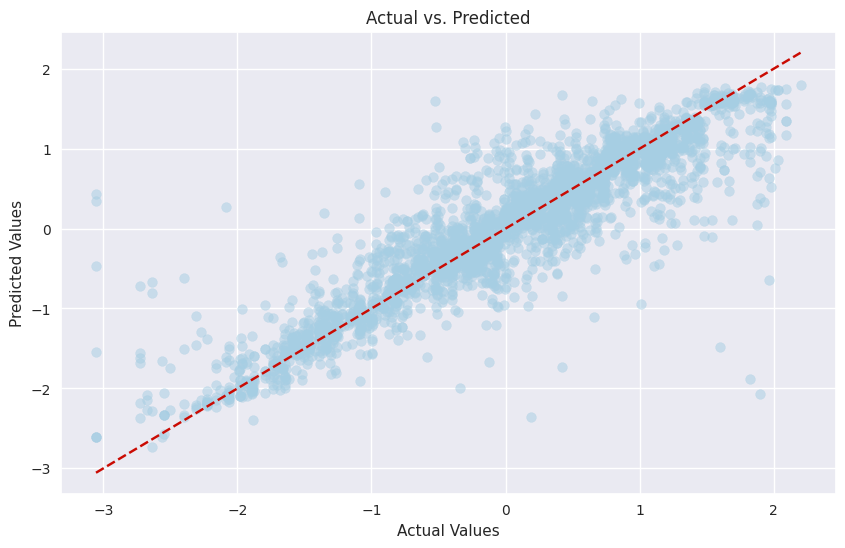

In [87]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')
plt.grid(True)
plt.show()

### Learning Curve


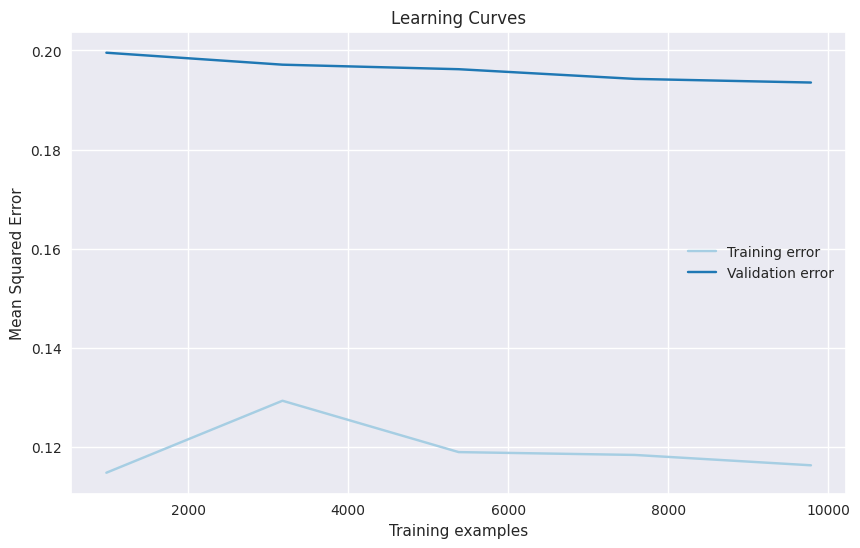

In [88]:
# Plot learning curves
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.xlabel('Training examples')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

# ***XAI***

We built a decision tree model whose predictions correlated 95.9% with the predictions of our own model, enabling us to explain the working of the XGBoost model. 

As can be seen with the feature importance, shapley values and the decision tree as well, fruitset is by far the most important feature. It explains the most variance and we can also see that in the shapley diagram, it has the most clear seggregation, which makes it valuable for yield prediction.

When looking at the PDPs, we can see that there are many kinks in all of the three plots. This may be a reason for us to introduce feature engineering in the future via binning of numerical data, converting it into categorical data.It can also be noticed however, that in general, fruitset and seeds positively correlated, while the plot for fruitmass seems rather flat, or even slightly negatively correlated. Except for a few outliers, the ICE plots for most of the observations in the dataset appear to follow the trend showcased by the average line. 

Looking at the model we can confirm the importance of fruitset feature in our model since it is the only variable used as criteria for explaining the predictions made on two levels. The other important feature in the DT is seeds.

## Feature importance and Shapley values

<Axes: >

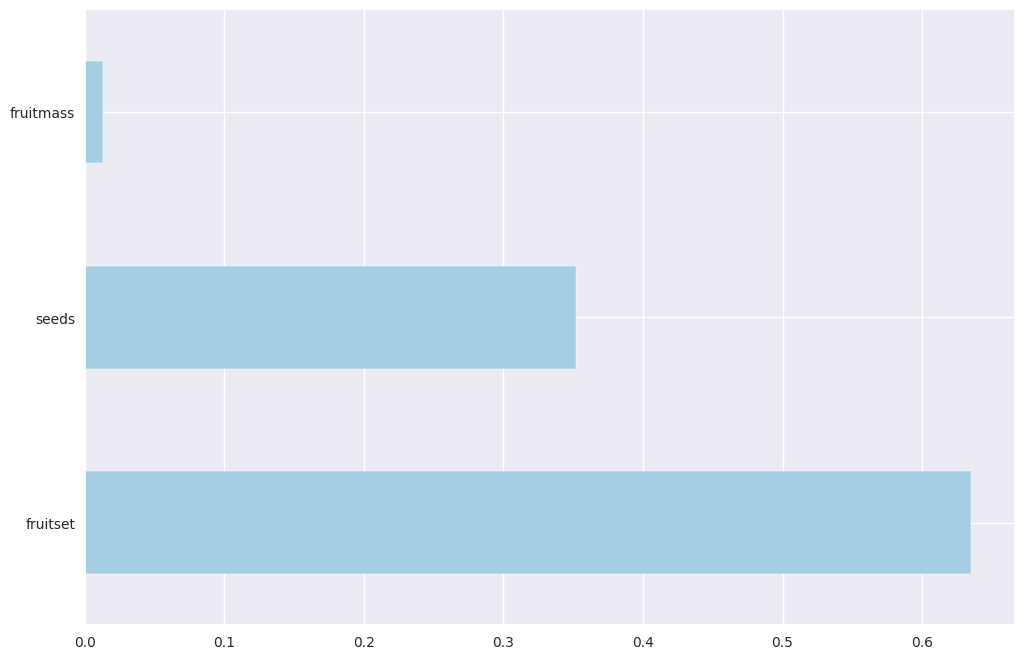

In [89]:
XGB_feature_importances = pd.Series(best_model_XGB.feature_importances_, index=selected)
XGB_feature_importances.nlargest(10).plot(kind='barh')

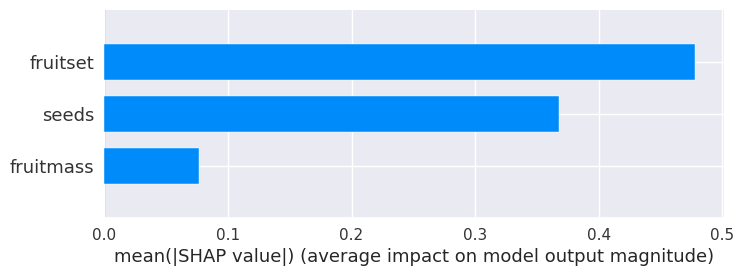

In [90]:
# Global (i.e., model-level) Shapley values
explainer = shap.TreeExplainer(best_model_XGB)
shap_values = explainer.shap_values(Selected_train)
shap.summary_plot(shap_values, Selected_train, plot_type='bar',feature_names=selected)

## PDPs

In [91]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay

In [92]:
import graphviz

In [93]:
print(selected)

['fruitset', 'seeds', 'fruitmass']


<Figure size 2000x1500 with 0 Axes>

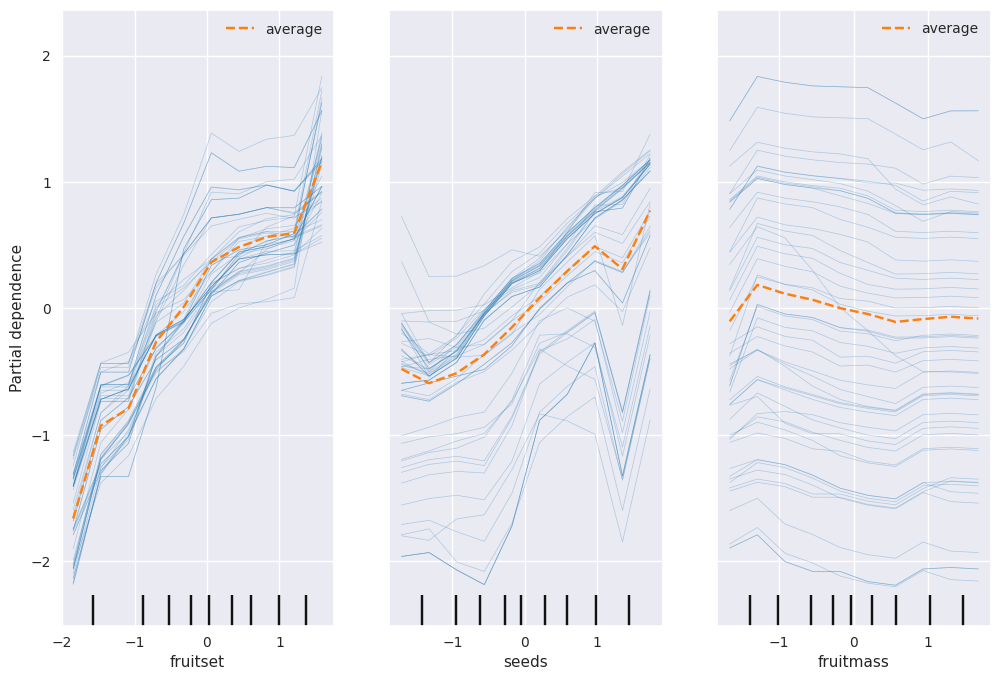

In [94]:
# Univariate Partial Dependence Plot
n = 50
fig = plt.figure(figsize=(20, 15))
pdp_features = ['fruitset', 'seeds', 'fruitmass']
PartialDependenceDisplay.from_estimator(
  best_model_XGB, Selected_test, pdp_features, kind="both", n_jobs=3, subsample=n, grid_resolution=10)
plt.legend(bbox_to_anchor=(1,1));

## Surrogate Models

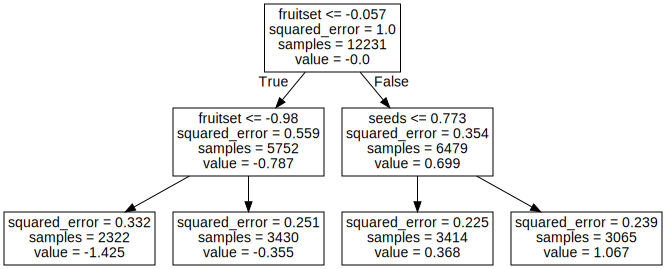

In [95]:
# Decision Tree surrogate for XGBRegressor model
proxy = DecisionTreeRegressor(random_state = 20850,max_depth=2)    # Control the depth of the surrogate model tree here
proxy.fit(Selected_train,y_Train_train_std)

tree_graph = tree.export_graphviz(proxy, out_file = None, feature_names = selected)
graphviz.Source(tree_graph)

In [96]:
# How good is this surrogate decision tree model? Let's find out...
y_proxy = proxy.predict(Selected_train) # Use the decision tree to make predictions
y_proxy = pd.DataFrame(y_proxy)

In [97]:
new_pred =pd.DataFrame(best_model_XGB.predict(Selected_train))


In [98]:
print('Correlation coefficient of XGBRegressor model predictions and Surrogate Model predictions: ',new_pred.corrwith(y_proxy,axis=0))

Correlation coefficient of XGBRegressor model predictions and Surrogate Model predictions:  0    0.956403
dtype: float64


In [99]:
# Multiple Linear Regression model (for XGBRegressor moel)
import statsmodels.api as sm
model = sm.OLS(y_Train_train_std, Selected_train).fit()
predictions = model.predict(Selected_train) 
 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                  yield   R-squared (uncentered):                   0.794
Model:                            OLS   Adj. R-squared (uncentered):              0.794
Method:                 Least Squares   F-statistic:                          1.572e+04
Date:                Wed, 17 May 2023   Prob (F-statistic):                        0.00
Time:                        16:38:48   Log-Likelihood:                         -7691.5
No. Observations:               12231   AIC:                                  1.539e+04
Df Residuals:                   12228   BIC:                                  1.541e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

##Local Impact

### Shapley Values

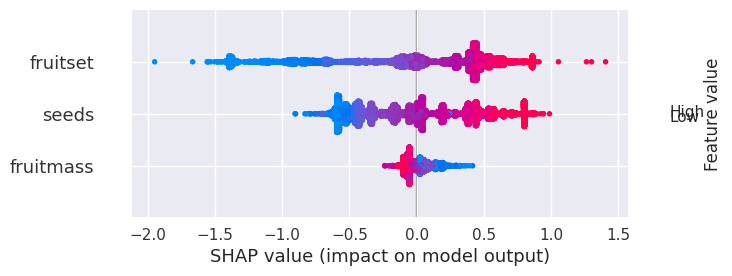

In [100]:
# Check direction of impact (local Shapley values)
shap.summary_plot(shap_values, Selected_train,feature_names=selected)

###LIME

In [101]:
!pip install lime
import lime
import lime.lime_tabular

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=3dceb3ee421fb446ac7af5c07f95b7dac703d9036c7035afada1830dcef5baaa
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [102]:
# Initialize the LimeTabularExplainer with the feature names and class names
explainer = lime.lime_tabular.LimeTabularExplainer(Selected_train.values,
                                                   feature_names=selected,
                                                   class_names=['yield'],
                                                   verbose=True,
                                                   mode='regression')

# Select a specific instance for explanation (you can change the index as per your requirement)
instance_idx = 0
instance = Selected_train.iloc[instance_idx]

# Generate an explanation using LIME
explanation = explainer.explain_instance(instance.values, best_model_XGB.predict, num_features=len(selected))

# Print the explanation
explanation.show_in_notebook()

# Alternatively, you can also print the explanation as text
print(explanation.as_list())

Intercept 0.13796331862149322
Prediction_local [-0.3779729]
Right: -0.24190189


[('-0.78 < seeds <= -0.03', -0.27331666015346023), ('-0.00 < fruitmass <= 0.81', -0.18490765593571454), ('-0.66 < fruitset <= 0.04', -0.05771190479882296)]


# ***Conclusion***

Through a lot of trial and error, we came to the conclusion of choosing XGBoost regressor as our champion. Along the way we observed the following:


1.   Not all features were important, infact after running 3 different feature importances (including elasticNet which forces features to go to 0 if they are unimportant) we ended up with only 3 features to create our model. 
2.   We did not have any missing values or duplicates so the entire analysis is free from SMOTING/ UNDERSAMPLING BIAS. We did have 1 heavily skewed feature, which was fixed, however, it was regarded as unimportant therefore did not have an impact on our analysis. 
3. We also so multi-colinearity with temperature features. We are assuming that the reason for this is because this dataset was artificially generated on kaggle.
4. We ran horse races amongst base regressors, and amongst stacked ensembles. Our metric of choice was MSE, and we also used R^2 to help finalize our model. XGBoost and Stacked Ensembles were the top performers. Since the business problem is not high stakes, we set a criteria of R^2 to be > 0.8 and to minimize MSE when choosing out models. 
5. Additionally we explored the pycaret solution and the Aquarium H20 auto AI, both of which we managed to beat using a model that is less compliciated and less compute heavy. We consider this as a win. 
6. We tuned our XGBoost model using grid search and validated our results by performing K-fold crossvalidation. 
7. We managed to successfully generate a simpler Decision Tree Surrogate model that was 95.9% correlated with our predictions, and hence successfully understood the working of our model through XAI tools like LIME, PDPs and Shapley Values.

